In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import sklearn.metrics
from pylab import rcParams
import math
%matplotlib inline
# pd.set_option('display.max_columns', 500)
# pd.set_option('display.max_rows', 500)

In [2]:
#load & view raw data
df = pd.read_csv('insurance_claims.csv')
df.head(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
5,256,39,104594,2006-10-12,OH,250/500,1000,1351.10,0,478456,...,2,NO,64100,6410,6410,51280,Saab,95,2003,Y
6,137,34,413978,2000-06-04,IN,250/500,1000,1333.35,0,441716,...,0,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N
7,165,37,429027,1990-02-03,IL,100/300,1000,1137.03,0,603195,...,2,YES,51590,9380,9380,32830,Audi,A5,2015,N
8,27,33,485665,1997-02-05,IL,100/300,500,1442.99,0,601734,...,1,YES,27700,2770,2770,22160,Toyota,Camry,2012,N
9,212,42,636550,2011-07-25,IL,100/300,500,1315.68,0,600983,...,1,?,42300,4700,4700,32900,Saab,92x,1996,N


## Business case

##### Claim related fraud is a huge problem in the insurance industry. It is quite complex and difficult to identify those unwanted claims. With Random Forest  Non-Parametric Machine Learning Algorithm, I am trying to troubleshoot and help the General Insurance industry with this problem.

##### The data that I have is from Automobile Insurance. I will be creating a predictive model that predicts if an insurance claim is fraudulent or not. The answere between YES/NO, is a Binary Classification task. A comparison study has been performed to understand which ML algorithm suits best to the dataset.

In [3]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [4]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [5]:
df.shape

(1000, 39)

In [6]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

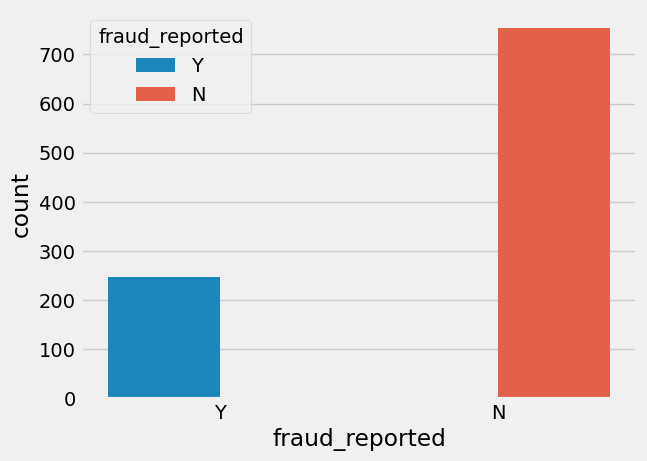

In [7]:
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='fraud_reported', data=df, hue='fraud_reported')

##### From above plot, like most fraud datasets, the label distribution is skewed.

In [8]:
df['fraud_reported'].value_counts() # Count number of frauds vs non-frauds

N    753
Y    247
Name: fraud_reported, dtype: int64

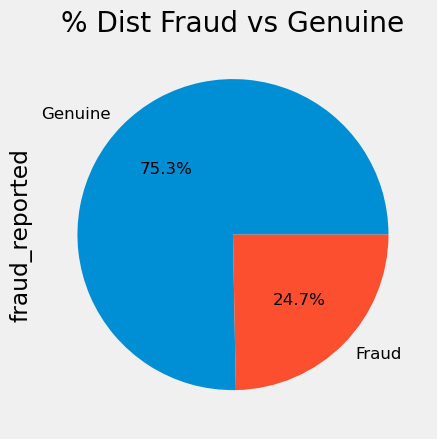

In [9]:
ax = (df['fraud_reported'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Genuine', 'Fraud'], fontsize=12)                                                                           
ax.set_title('% Dist Fraud vs Genuine')
plt.show()

##### Here we see that almost 24.7% fraud reported.  Let’s try to look for an indicative variable, analyzing location where incident occured.

In [10]:
df['incident_state'].value_counts()

NY    262
SC    248
WV    217
NC    110
VA    110
PA     30
OH     23
Name: incident_state, dtype: int64

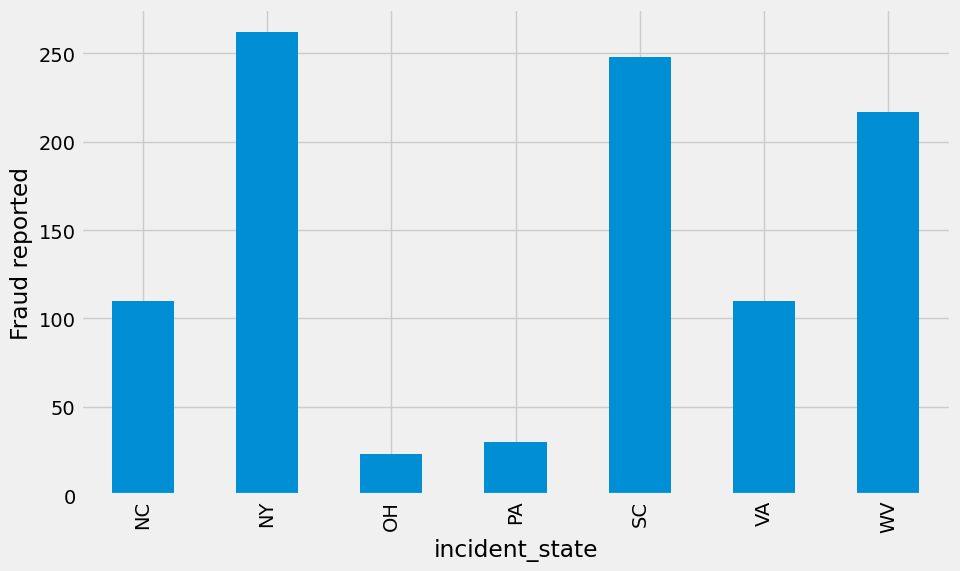

In [11]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = df.groupby('incident_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

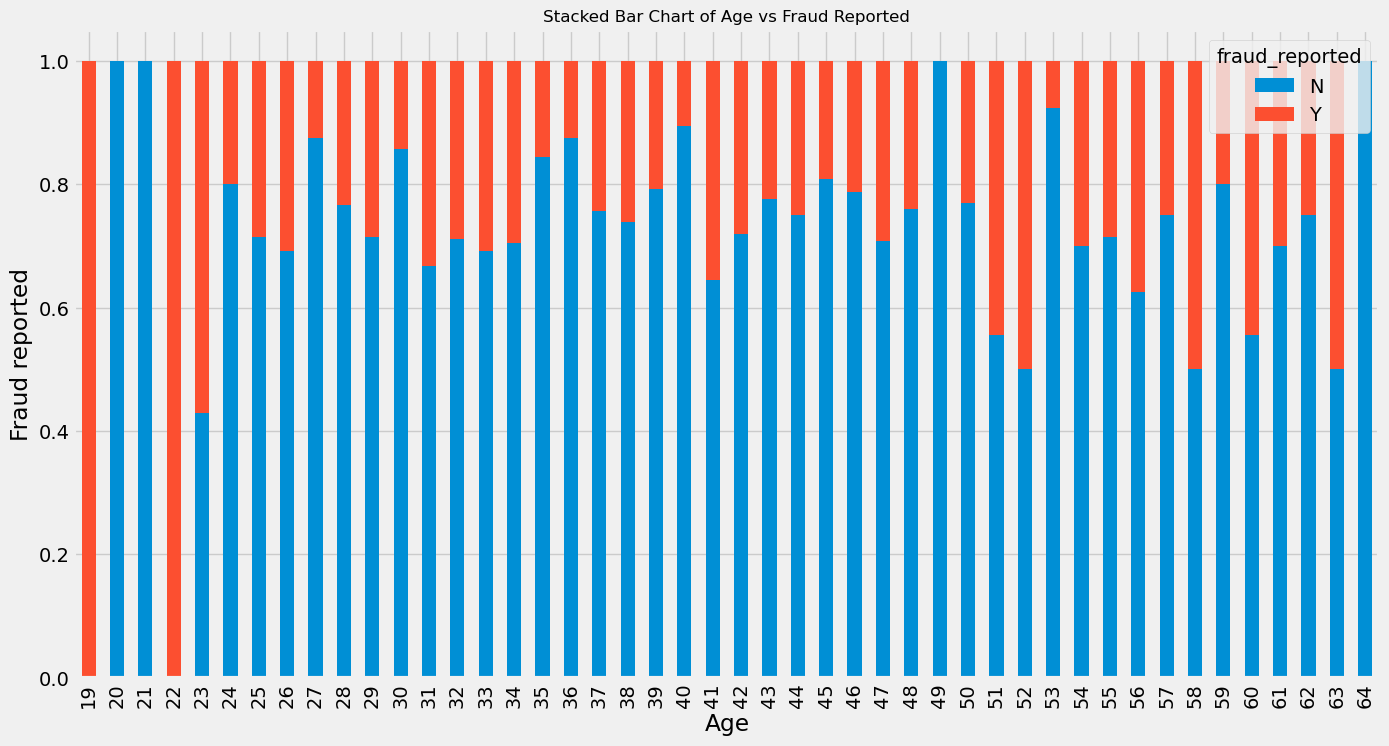

In [12]:
plt.rcParams['figure.figsize'] = [15, 8]
ax= plt.style.use('fivethirtyeight')
table=pd.crosstab(df.age, df.fraud_reported)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Age vs Fraud Reported', fontsize=12)
plt.xlabel('Age')
plt.ylabel('Fraud reported')
plt.show()

##### From above plot, it is obvious that, age is an important predictor for fraud reported. Age between 19-23 shows substantial number od fraud report.

#### Above graph shows fraud claims are more like to happen where umbrella limit is = 0.00, contradictory to our initial assumptions.

/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Policy deductable value wise Fraudulent claims')

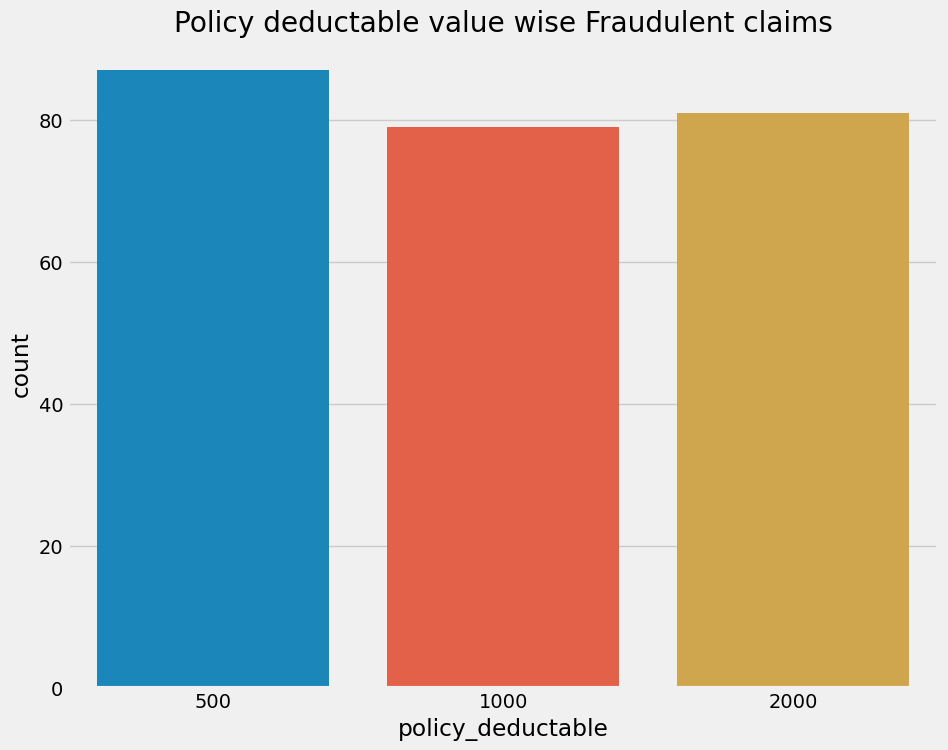

In [13]:
f, ax = plt.subplots(figsize=(10,8)) 
ax = sns.countplot(df.policy_deductable[df['fraud_reported']== 'Y'])
ax.set_title('Policy deductable value wise Fraudulent claims')

/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Policy annual preimium value wise Fraudulent claims')

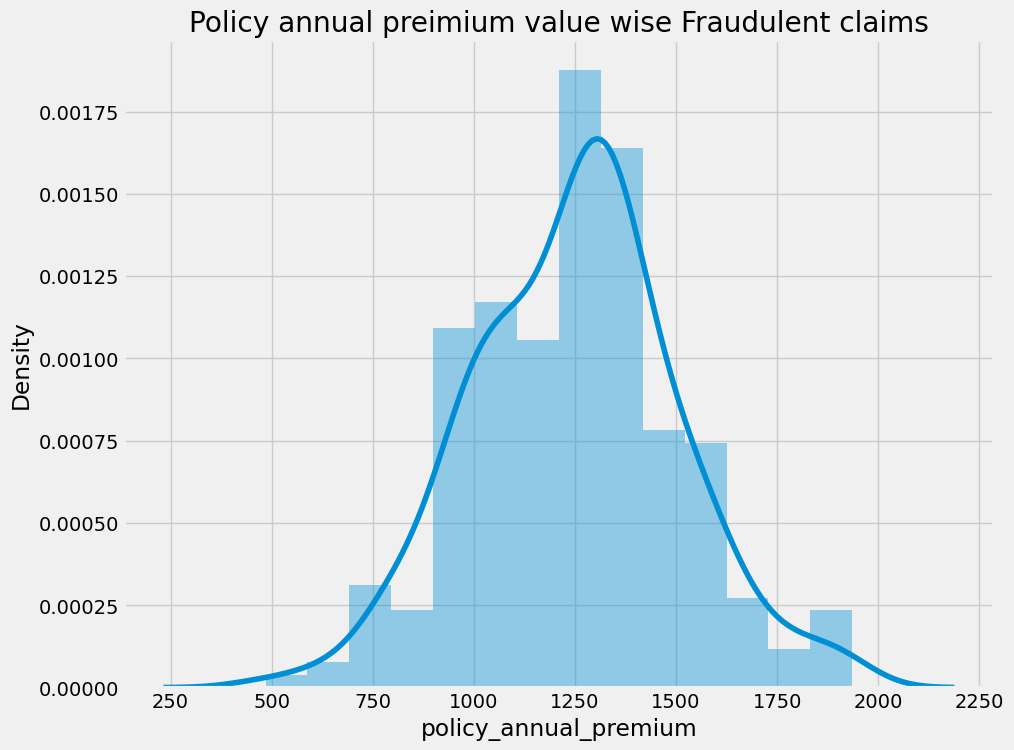

In [14]:
f, ax = plt.subplots(figsize=(10,8)) 
ax = sns.distplot(df.policy_annual_premium[df['fraud_reported']== 'Y'])
ax.set_title('Policy annual preimium value wise Fraudulent claims')

### 50% of fradulent claims have an annual policy premium of range $1000-1500, peak @ 1250

/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Insured customers occupation relation to Fraudulent claims')

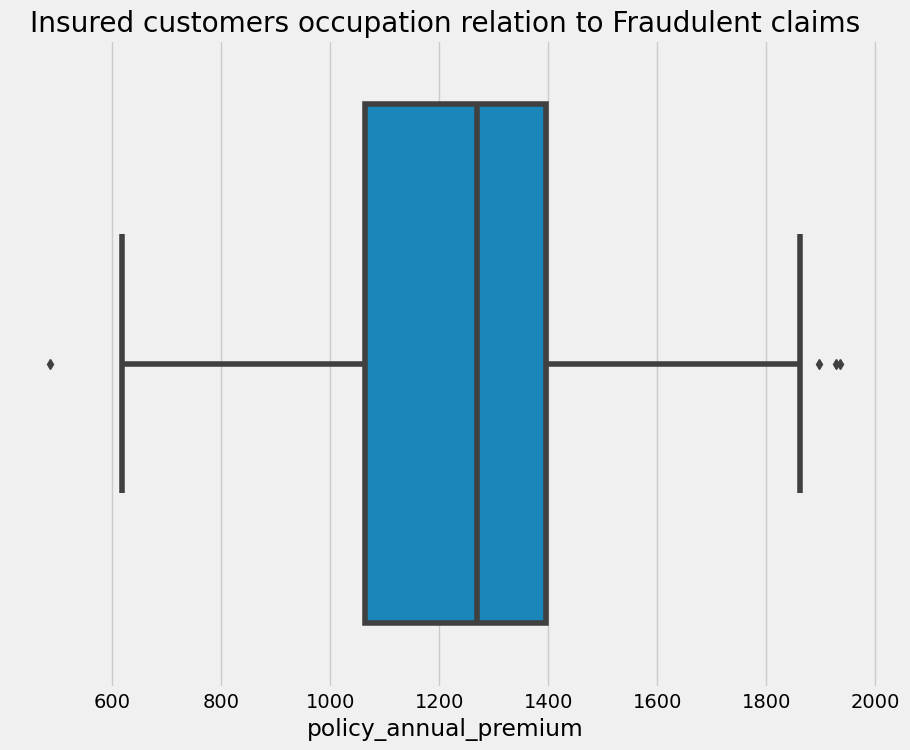

In [15]:
f, ax = plt.subplots(figsize=(10,8)) 
ax = sns.boxplot(df. policy_annual_premium[df['fraud_reported']== 'Y'])
ax.set_title('Insured customers occupation relation to Fraudulent claims')

/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


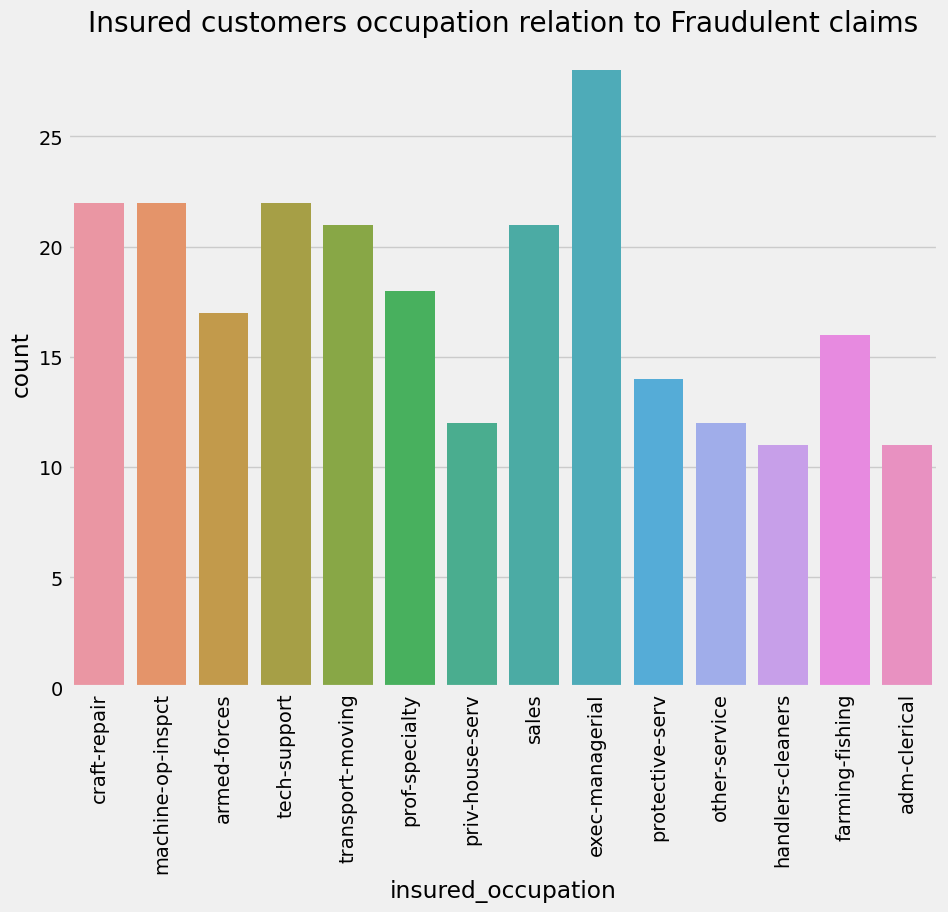

In [16]:
f, ax = plt.subplots(figsize=(10,8)) 
ax = sns.countplot(df. insured_occupation[df['fraud_reported']== 'Y'])
ax.set_title('Insured customers occupation relation to Fraudulent claims')
ax.tick_params(axis='x', rotation=90)

#### We can see a higher fradulent calim trend with Exec.Managerial roles.

#### As illustrated we can see slightly higher NO / NA police report avialabilty for fradulent claims

/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


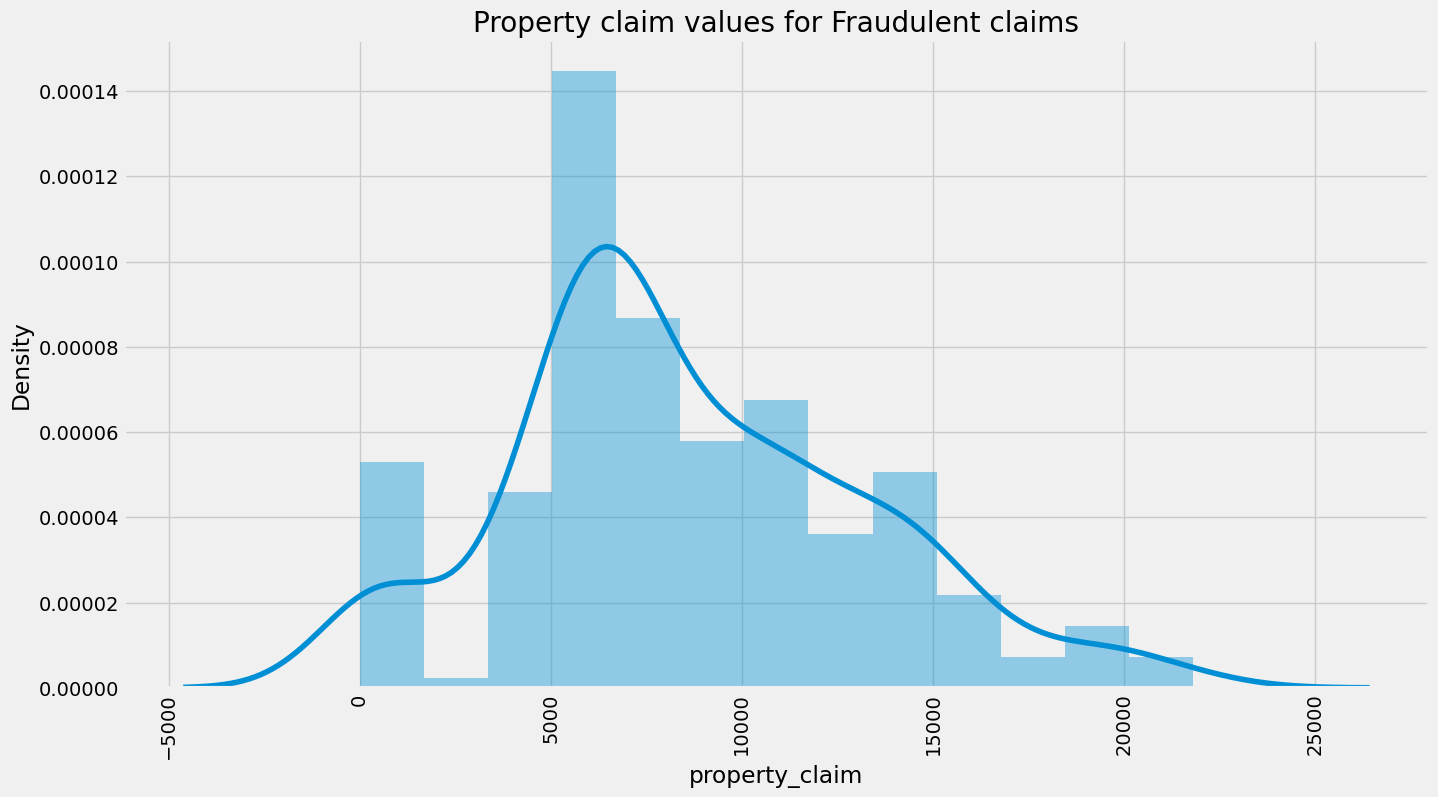

In [17]:
f, ax = plt.subplots() #(figsize=(10,8)) 
ax = sns.distplot(df. property_claim[df['fraud_reported']== 'Y'])
ax.set_title('Property claim values for Fraudulent claims')
ax.tick_params(axis='x', rotation=90)

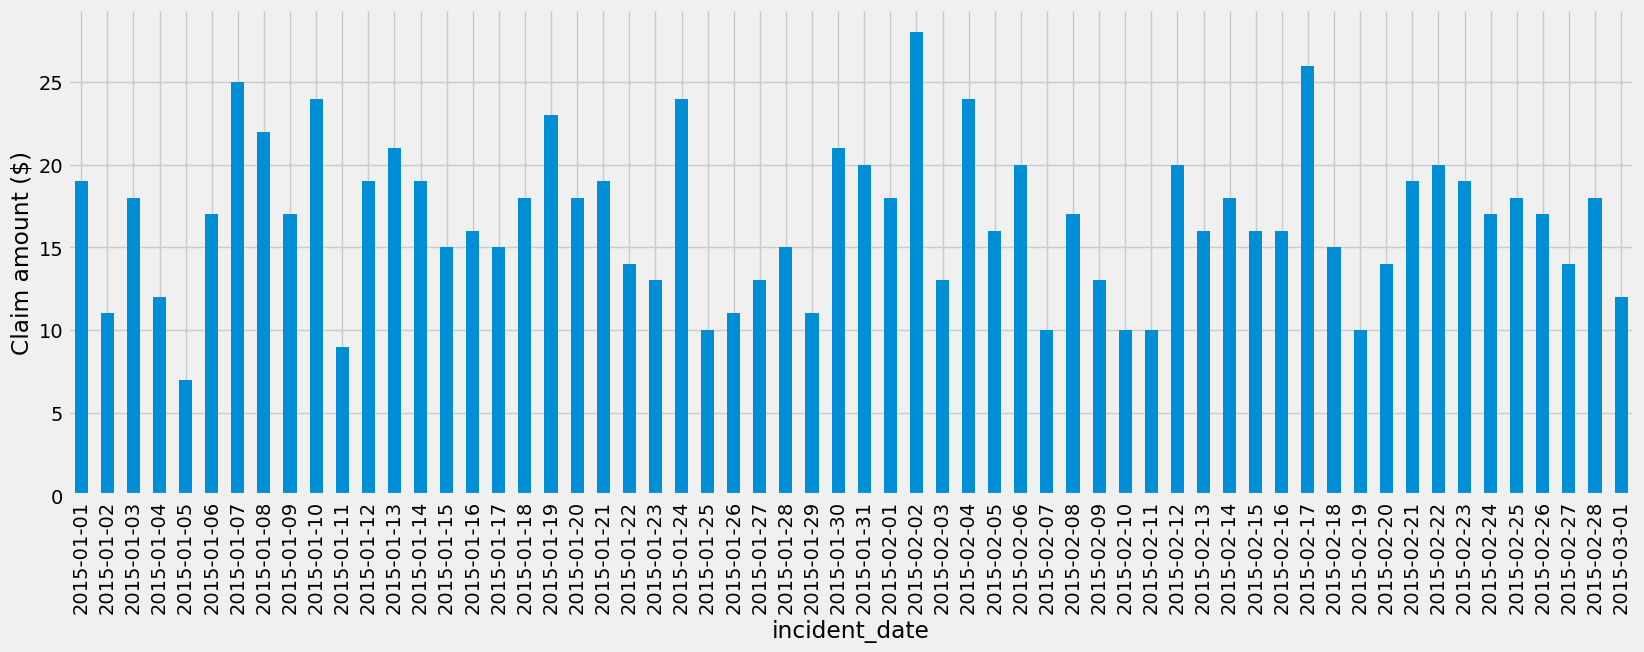

In [18]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(18,6))
ax = df.groupby('incident_date').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Claim amount ($)')
plt.show()

##### We see that, all the cases in above plot are for the months of January and February 2015

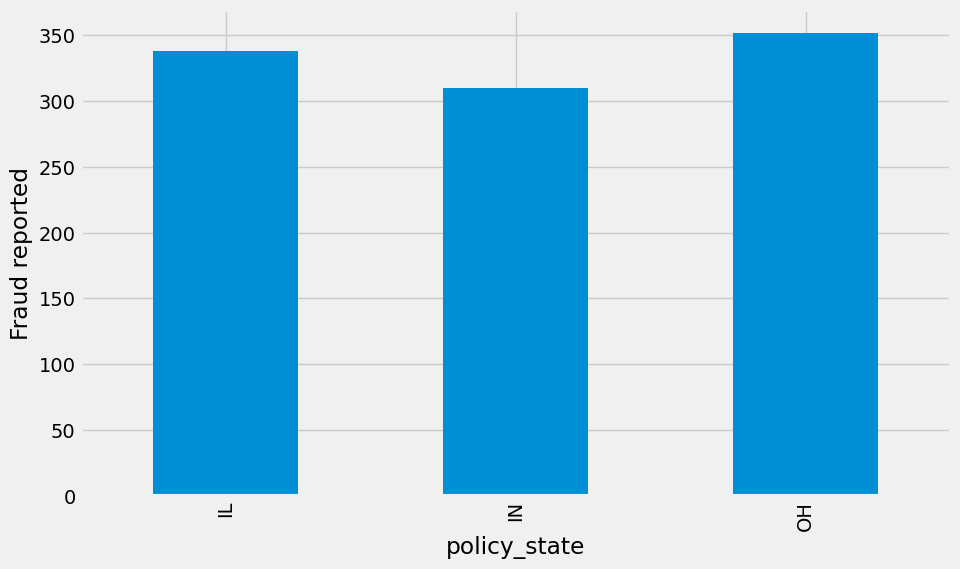

In [19]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = df.groupby('policy_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

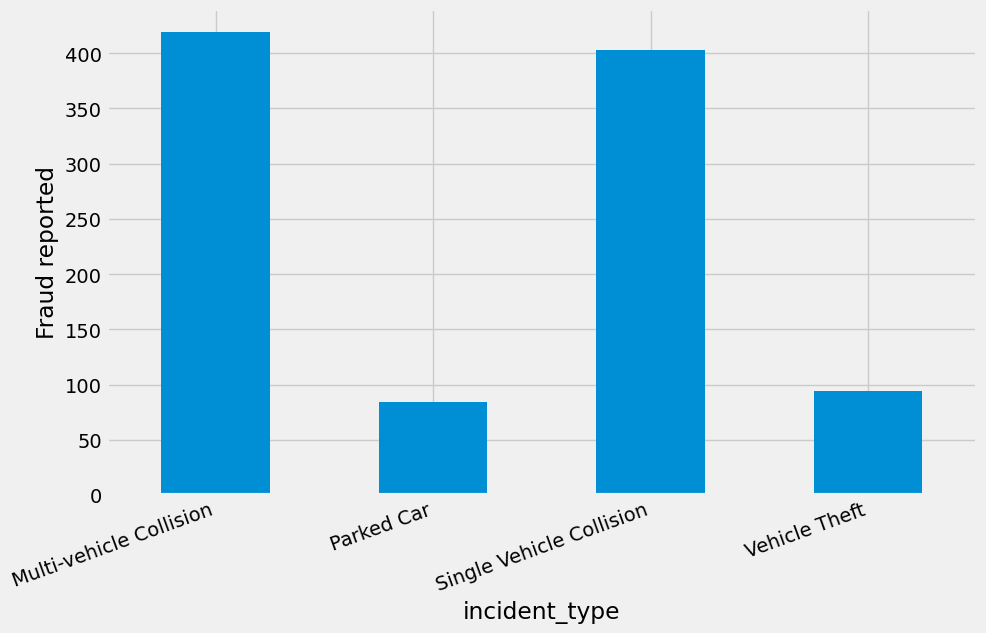

In [20]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = df.groupby('incident_type').fraud_reported.count().plot.bar(ylim=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
ax.set_ylabel('Fraud reported')
plt.show()

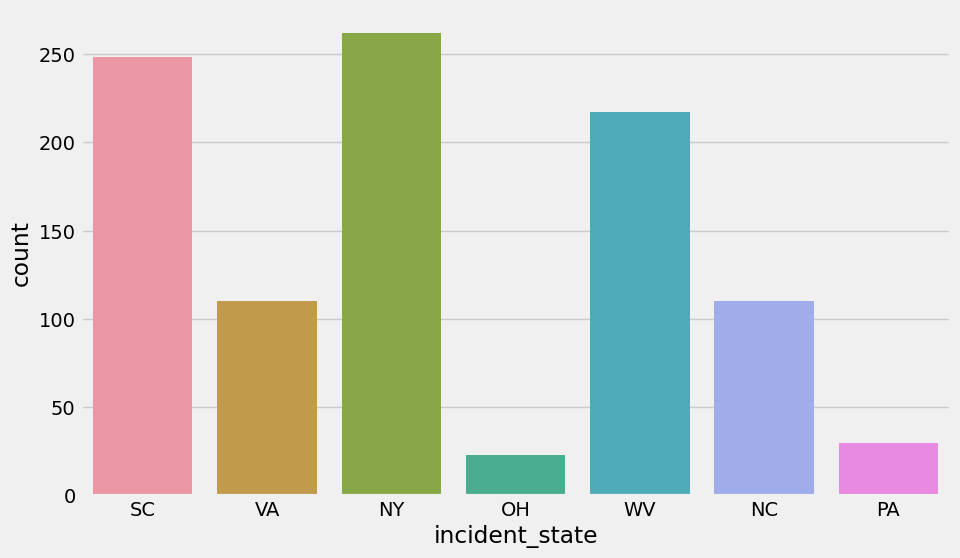

In [21]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='incident_state', data=df)

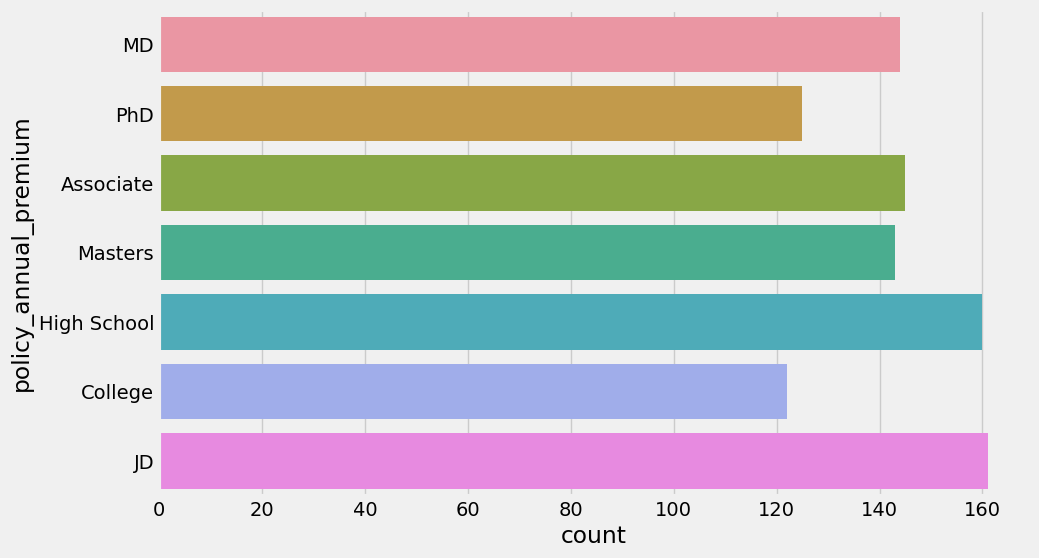

In [22]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(y = 'insured_education_level', data=df) 
ax.set_ylabel('policy_annual_premium')
plt.show()

# # Breakdown of Average Vehicle claim by insured's education level, grouped by fraud reported

Text(0, 0.5, 'Fraud reported')

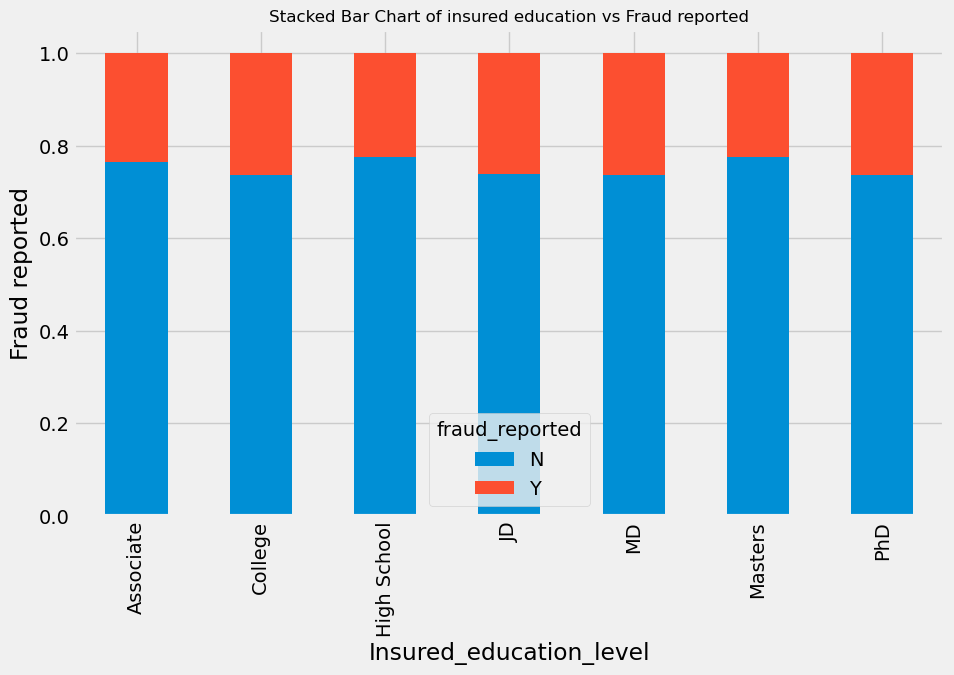

In [23]:
plt.rcParams['figure.figsize'] = [10, 6]
table=pd.crosstab(df.insured_education_level, df.fraud_reported)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of insured education vs Fraud reported', fontsize=12)
plt.xlabel('Insured_education_level')
plt.ylabel('Fraud reported')

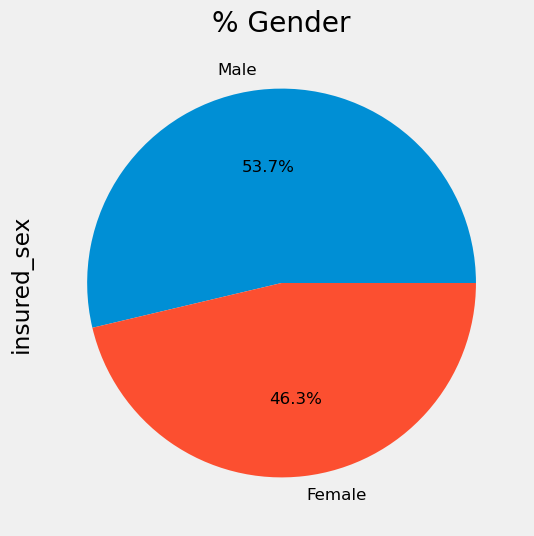

In [24]:
ax = (df['insured_sex'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Male', 'Female'], fontsize=12)                                                                           
ax.set_title('% Gender')
plt.show()

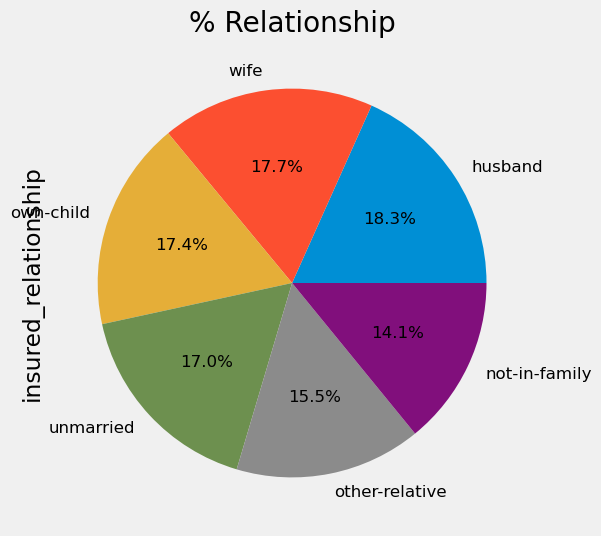

In [25]:
ax = (df['insured_relationship'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['husband', 'wife', 'own-child', 'unmarried', 'other-relative', 'not-in-family'],
         fontsize=12)                                                                           
ax.set_title('% Relationship')
plt.show()

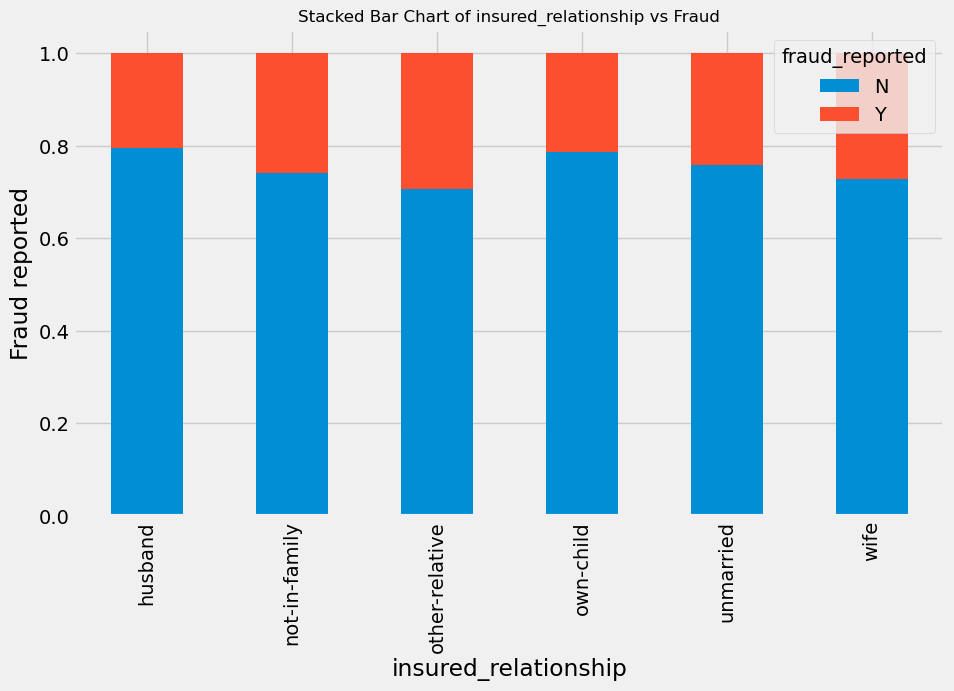

In [26]:
table=pd.crosstab(df.insured_relationship, df.fraud_reported)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of insured_relationship vs Fraud', fontsize=12)
plt.xlabel('insured_relationship')
plt.ylabel('Fraud reported')
plt.show()

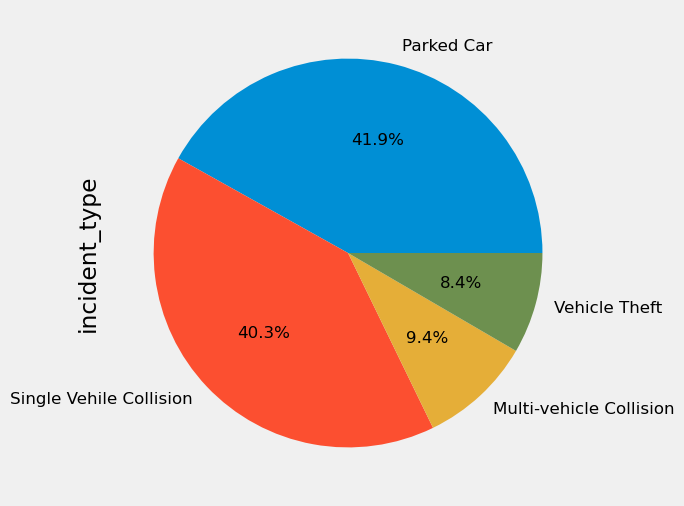

In [27]:
fig = plt.figure(figsize=(10,6))
ax = (df['incident_type'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Parked Car', 'Single Vehile Collision', 'Multi-vehicle Collision', 'Vehicle Theft'],
         fontsize=12) 

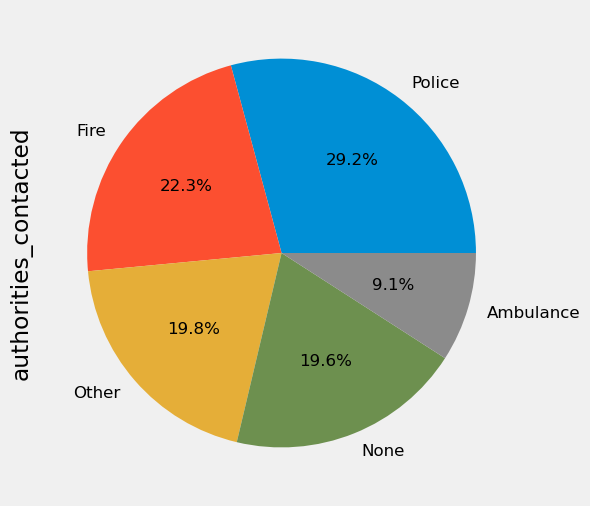

In [28]:
fig = plt.figure(figsize=(10,6))
ax = (df['authorities_contacted'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Police', 'Fire', 'Other', 'None', 'Ambulance'],
         fontsize=12) 

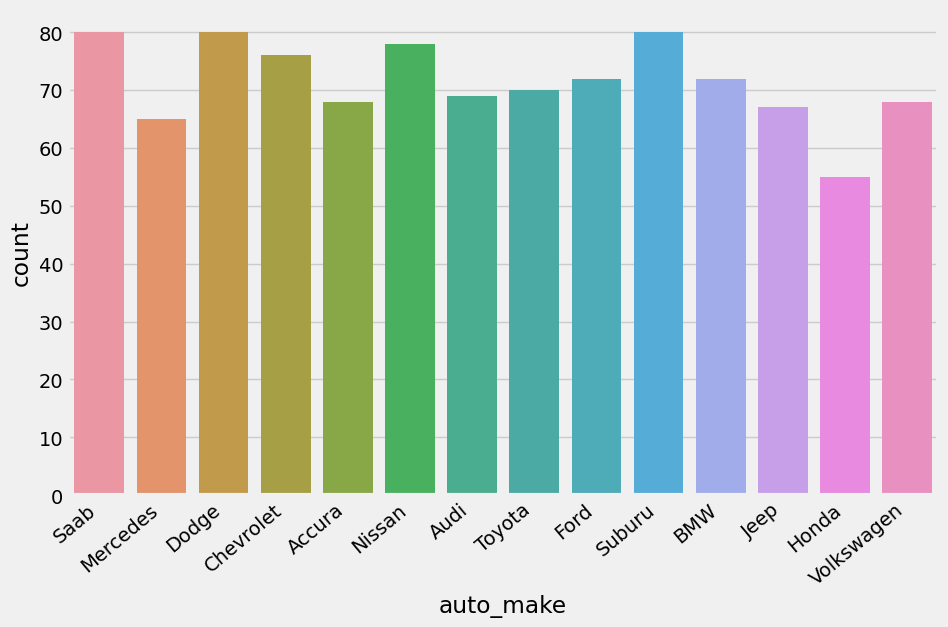

In [29]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='auto_make', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

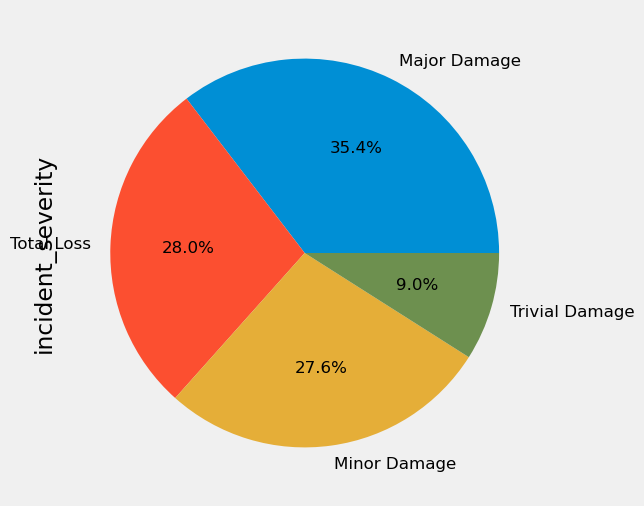

In [30]:
fig = plt.figure(figsize=(10,6))
ax = (df['incident_severity'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Major Damage', 'Total Loss', 'Minor Damage', 'Trivial Damage'],
         fontsize=12)  

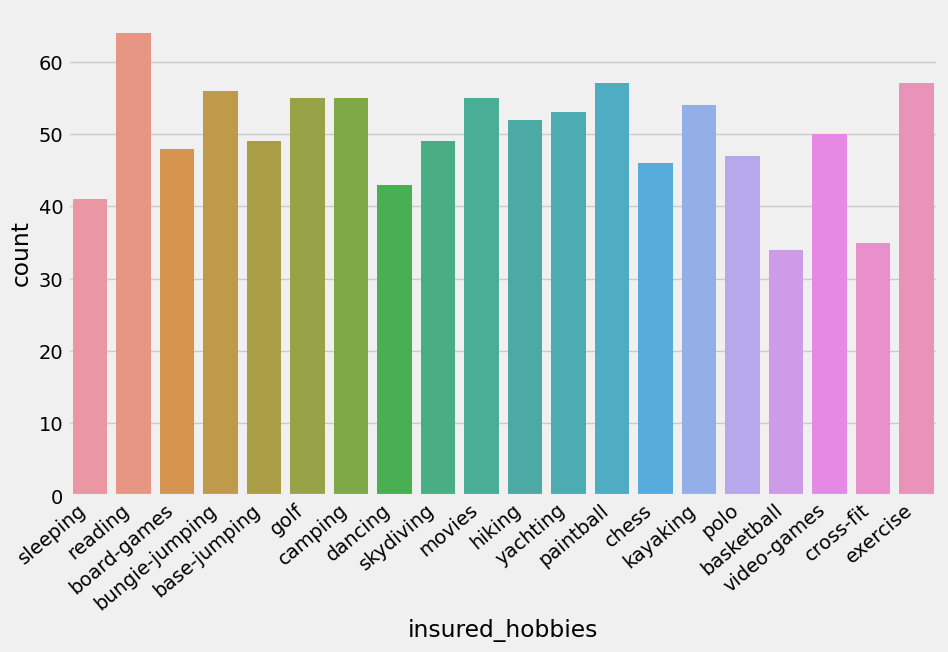

In [31]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='insured_hobbies', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [32]:
df["insured_occupation"].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

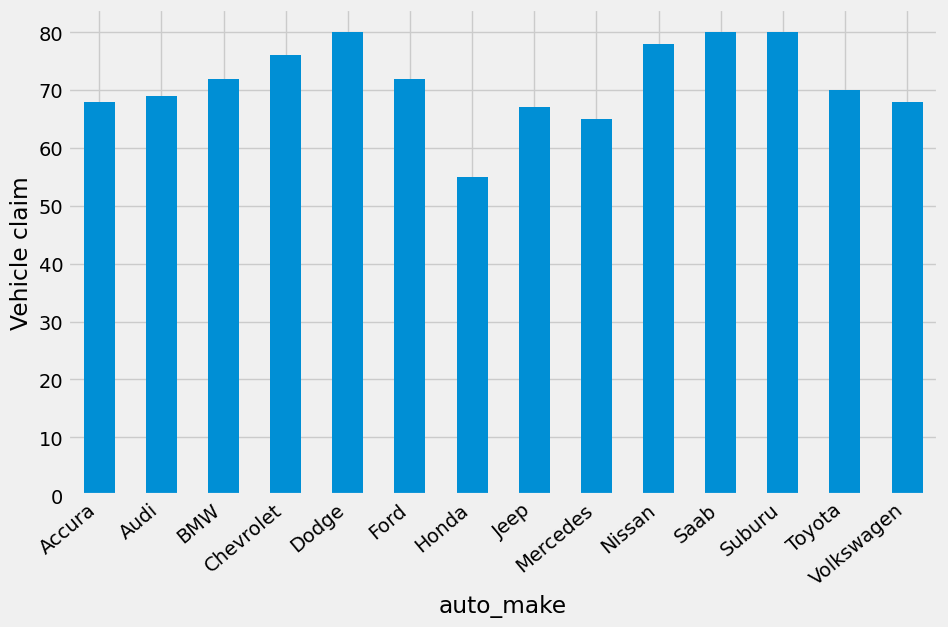

In [33]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax= df.groupby('auto_make').vehicle_claim.count().plot.bar(ylim=0)
ax.set_ylabel('Vehicle claim')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

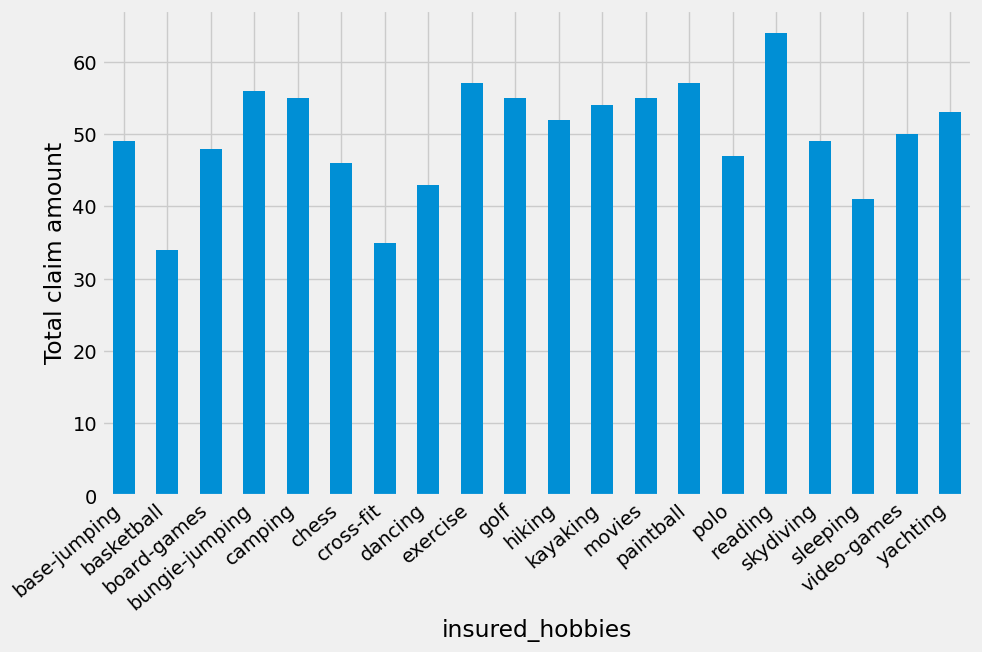

In [34]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax= df.groupby('insured_hobbies').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('Total claim amount')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()


### Data Processing

Cleaning up the data and prepare it for machine learning model.

In [35]:
df['fraud_reported'].replace(to_replace='Y', value=1, inplace=True)
df['fraud_reported'].replace(to_replace='N',  value=0, inplace=True)

df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,1
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,1
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,0
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,0


In [36]:
df[['insured_zip']] = df[['insured_zip']].astype(object)

In [37]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,0.247000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,0.431483
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,0.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,0.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,0.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,0.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,1.000000


###### Some variables such as 'policy_bind_date', 'incident_date', 'incident_location' and 'insured_zip' contain very high number of level. We will remove these columns for our purposes. 

##### Let's view  summary of all the column with the object data-type :

In [38]:
df.describe(include='all')

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000,1000,1000,1000.000000,1000.000000,1.000000e+03,1000.0,...,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000,1000.000000
unique,NaN,NaN,NaN,951,3,3,NaN,NaN,NaN,995.0,...,NaN,3,NaN,NaN,NaN,NaN,14,39,NaN,NaN
top,NaN,NaN,NaN,2006-01-01,OH,250/500,NaN,NaN,NaN,431202.0,...,NaN,NO,NaN,NaN,NaN,NaN,Saab,RAM,NaN,NaN
freq,NaN,NaN,NaN,3,352,351,NaN,NaN,NaN,2.0,...,NaN,343,NaN,NaN,NaN,NaN,80,43,NaN,NaN
mean,203.954000,38.948000,546238.648000,NaN,NaN,NaN,1136.000000,1256.406150,1.101000e+06,NaN,...,1.487000,NaN,52761.94000,7433.420000,7399.570000,37928.950000,NaN,NaN,2005.103000,0.247000
std,115.113174,9.140287,257063.005276,NaN,NaN,NaN,611.864673,244.167395,2.297407e+06,NaN,...,1.111335,NaN,26401.53319,4880.951853,4824.726179,18886.252893,NaN,NaN,6.015861,0.431483
min,0.000000,19.000000,100804.000000,NaN,NaN,NaN,500.000000,433.330000,-1.000000e+06,NaN,...,0.000000,NaN,100.00000,0.000000,0.000000,70.000000,NaN,NaN,1995.000000,0.000000
25%,115.750000,32.000000,335980.250000,NaN,NaN,NaN,500.000000,1089.607500,0.000000e+00,NaN,...,1.000000,NaN,41812.50000,4295.000000,4445.000000,30292.500000,NaN,NaN,2000.000000,0.000000
50%,199.500000,38.000000,533135.000000,NaN,NaN,NaN,1000.000000,1257.200000,0.000000e+00,NaN,...,1.000000,NaN,58055.00000,6775.000000,6750.000000,42100.000000,NaN,NaN,2005.000000,0.000000
75%,276.250000,44.000000,759099.750000,NaN,NaN,NaN,2000.000000,1415.695000,0.000000e+00,NaN,...,2.000000,NaN,70592.50000,11305.000000,10885.000000,50822.500000,NaN,NaN,2010.000000,0.000000


##### Some values in the table are shown here as “NaN”. We will see how to deal with these missing values.

###### policy_csl looks like an unavidable predictor.

In [39]:
df['csl_per_person'] = df.policy_csl.str.split('/', expand=True)[0]
df['csl_per_accident'] = df.policy_csl.str.split('/', expand=True)[1]

In [40]:
df['csl_per_person'].head()

0    250
1    250
2    100
3    250
4    500
Name: csl_per_person, dtype: object

In [41]:
df[df['fraud_reported'] ==1].head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,csl_per_person,csl_per_accident
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,71610,6510,13020,52080,Saab,92x,2004,1,250,500
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,5070,780,780,3510,Mercedes,E400,2007,1,250,500
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1,250,500
5,256,39,104594,2006-10-12,OH,250/500,1000,1351.10,0,478456,...,64100,6410,6410,51280,Saab,95,2003,1,250,500
14,180,38,644081,1998-12-28,OH,250/500,2000,1301.13,0,476685,...,46200,4200,8400,33600,Dodge,Neon,2003,1,250,500


In [42]:
df['csl_per_accident'].head()

0     500
1     500
2     300
3     500
4    1000
Name: csl_per_accident, dtype: object

In [43]:
df.auto_year.value_counts()  # check the spread of years to decide on further action.

1995    56
1999    55
2005    54
2011    53
2006    53
2007    52
2003    51
2010    50
2009    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64

###### auto_year has 21 levels, and the number of records for each of the levels are quite significant considering datasize is not so large. We will do some feature engineering using this variable considering, the year of manufacturing of automobile indicates the age of the vehicle and may contain valuable information for insurance premium or fraud is concerned. 

In [44]:
df['vehicle_age'] = 2018 - df['auto_year'] # Deriving the age of the vehicle based on the year value 
df['vehicle_age'].head(10)

0    14
1    11
2    11
3     4
4     9
5    15
6     6
7     3
8     6
9    22
Name: vehicle_age, dtype: int64

In [45]:
bins = [-1, 3, 6, 9, 12, 17, 20, 24]  # Factorize according to the time period of the day.
names = ["past_midnight", "early_morning", "morning", 'fore-noon', 'afternoon', 'evening', 'night']
df['incident_period_of_day'] = pd.cut(df.incident_hour_of_the_day, bins, labels=names).astype(object)
df[['incident_hour_of_the_day', 'incident_period_of_day']].head(20)

,incident_hour_of_the_day,incident_period_of_day
0,5,early_morning
1,8,morning
2,7,morning
3,5,early_morning
4,20,evening
5,19,evening
6,0,past_midnight
7,23,night
8,21,night
9,14,afternoon


In [46]:
# Check on categorical variables:
df.select_dtypes(include=['object']).columns  # checking categorcial columns

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_zip',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'incident_date',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'property_damage', 'police_report_available',
       'auto_make', 'auto_model', 'csl_per_person', 'csl_per_accident',
       'incident_period_of_day'],
      dtype='object')

In [47]:
df.loc[(df['policy_bind_date'] > df['incident_date']) & (df['fraud_reported'] == 1 )]

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,csl_per_person,csl_per_accident,vehicle_age,incident_period_of_day


In [48]:
df_ogi = df.copy(deep=True)


In [49]:
df_ogi.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'csl_per_person',
       'csl_per_accident', 'vehicle_age', 'incident_period_of_day'],
      dtype='object')

In [50]:
# dropping unimportant columns

df = df.drop(columns = [
    # 'policy_number', 
    'policy_csl',
    'insured_zip',
    'policy_bind_date', 
    'incident_date', 
    'incident_location',  
    'auto_year', 
    'incident_hour_of_the_day'])

df.head(2)

,months_as_customer,age,policy_number,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,csl_per_person,csl_per_accident,vehicle_age,incident_period_of_day
0,328,48,521585,OH,1000,1406.91,0,MALE,MD,craft-repair,...,6510,13020,52080,Saab,92x,1,250,500,14,early_morning
1,228,42,342868,IN,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,780,780,3510,Mercedes,E400,1,250,500,11,morning


In [51]:
# identify variables with '?' values
unknowns = {}
for i in list(df.columns):
    if (df[i]).dtype == object:
        j = np.sum(df[i] == "?")
        unknowns[i] = j
unknowns = pd.DataFrame.from_dict(unknowns, orient = 'index')
print(unknowns)

                           0
policy_state               0
insured_sex                0
insured_education_level    0
insured_occupation         0
insured_hobbies            0
insured_relationship       0
incident_type              0
collision_type           178
incident_severity          0
authorities_contacted      0
incident_state             0
incident_city              0
property_damage          360
police_report_available  343
auto_make                  0
auto_model                 0
csl_per_person             0
csl_per_accident           0
incident_period_of_day     0


##### collision_type, property_damage, police_report_available contain many missing values. So,  first isolate these variables, inspect these individually for spread of category values.

In [52]:
df.collision_type.value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

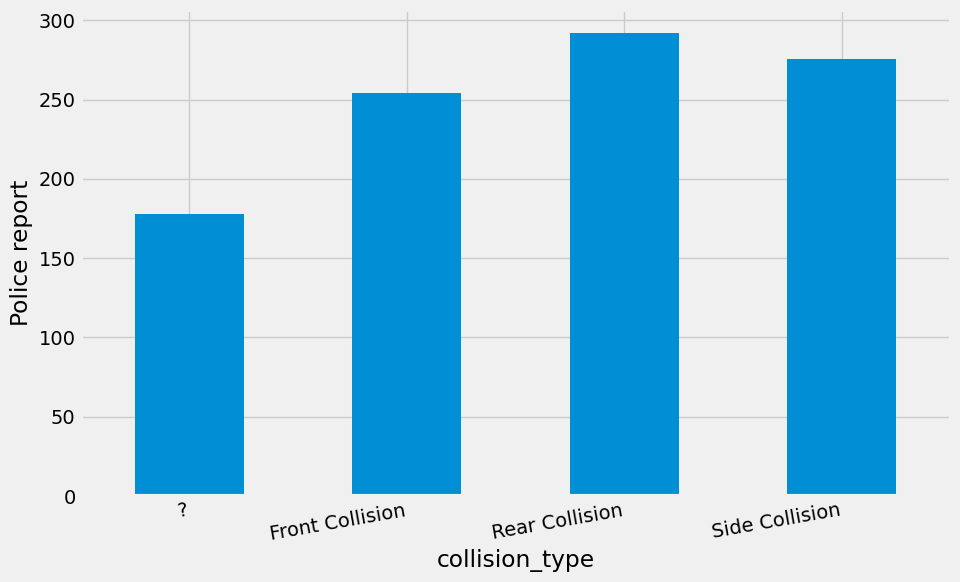

In [53]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax= df.groupby('collision_type').police_report_available.count().plot.bar(ylim=0)
ax.set_ylabel('Police report')
ax.set_xticklabels(ax.get_xticklabels(), rotation=10, ha="right")
plt.show()

In [54]:
df.property_damage.value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

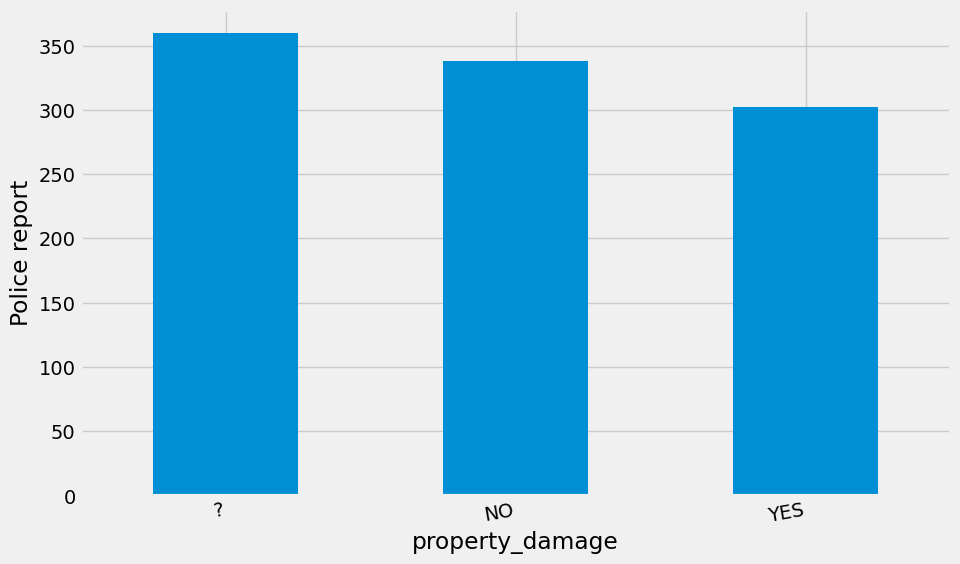

In [55]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax= df.groupby('property_damage').police_report_available.count().plot.bar(ylim=0)
ax.set_ylabel('Police report')
ax.set_xticklabels(ax.get_xticklabels(), rotation=10, ha="right")
plt.show()

In [56]:
df.police_report_available.value_counts()

NO     343
?      343
YES    314
Name: police_report_available, dtype: int64

In [57]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_state',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'fraud_reported', 'csl_per_person', 'csl_per_accident',
       'vehicle_age', 'incident_period_of_day'],
      dtype='object')

In [58]:
df._get_numeric_data().head()  # Checking numeric columns

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported,vehicle_age
0,328,48,521585,1000,1406.91,0,53300,0,1,1,2,71610,6510,13020,52080,1,14
1,228,42,342868,2000,1197.22,5000000,0,0,1,0,0,5070,780,780,3510,1,11
2,134,29,687698,2000,1413.14,5000000,35100,0,3,2,3,34650,7700,3850,23100,0,11
3,256,41,227811,2000,1415.74,6000000,48900,-62400,1,1,2,63400,6340,6340,50720,1,4
4,228,44,367455,1000,1583.91,6000000,66000,-46000,1,0,1,6500,1300,650,4550,0,9


In [59]:
df._get_numeric_data().columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'capital-gains',
       'capital-loss', 'number_of_vehicles_involved', 'bodily_injuries',
       'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim', 'fraud_reported', 'vehicle_age'],
      dtype='object')

In [60]:
df.select_dtypes(include=['object']).columns  # checking categorcial columns

Index(['policy_state', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'csl_per_person', 'csl_per_accident', 'incident_period_of_day'],
      dtype='object')

In [61]:
#feature Tunning
import featuretools as ft

In [62]:
dfFeatureTune = df.copy(deep=True)

dfFeatureTune['index'] = dfFeatureTune.index
len(dfFeatureTune['index'].unique().tolist())
dfFeatureTune.head()

,months_as_customer,age,policy_number,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,csl_per_person,csl_per_accident,vehicle_age,incident_period_of_day,index
0,328,48,521585,OH,1000,1406.91,0,MALE,MD,craft-repair,...,13020,52080,Saab,92x,1,250,500,14,early_morning,0
1,228,42,342868,IN,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,780,3510,Mercedes,E400,1,250,500,11,morning,1
2,134,29,687698,OH,2000,1413.14,5000000,FEMALE,PhD,sales,...,3850,23100,Dodge,RAM,0,100,300,11,morning,2
3,256,41,227811,IL,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,6340,50720,Chevrolet,Tahoe,1,250,500,4,early_morning,3
4,228,44,367455,IL,1000,1583.91,6000000,MALE,Associate,sales,...,650,4550,Accura,RSX,0,500,1000,9,evening,4


In [63]:
es = ft.EntitySet()
es = es.entity_from_dataframe(dataframe=dfFeatureTune,entity_id='index2',index='index2',make_index =True)

es

Entityset: None
  Entities:
    index2 [Rows: 1000, Columns: 38]
  Relationships:
    No relationships

In [64]:
# feature_matrix, feature_defs = ft.dfs(
#     entityset=es,
#     max_depth=1,
# )

# feature_matrix

In [65]:
# import tsfresh

In [66]:
# from tsfresh import extract_features
# extracted_features = extract_features(dfFeatureTune, column_id="policy_state")

#### Applying one-hot encoding to convert all categorical variables except out target variables 
 'collision_type',
 'property_damage',
 'police_report_available',
 'fraud_reported'

In [67]:
dummies = pd.get_dummies(df[[
    'policy_state', 
    'insured_sex', 
    'insured_education_level',
    'insured_occupation', 
    'insured_hobbies', 
    'insured_relationship',
    'incident_type', 
    'incident_severity',
    'authorities_contacted', 
    'incident_state', 
    'incident_city',
    'auto_make', 
    'auto_model', 
    'csl_per_person', 
    'csl_per_accident',
    'incident_period_of_day']])

dummies = dummies.join(df[[
    'collision_type', 
    'property_damage', 
    'police_report_available', 
    "fraud_reported"]])

dummies.head()

,policy_state_IL,policy_state_IN,policy_state_OH,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,...,incident_period_of_day_early_morning,incident_period_of_day_evening,incident_period_of_day_fore-noon,incident_period_of_day_morning,incident_period_of_day_night,incident_period_of_day_past_midnight,collision_type,property_damage,police_report_available,fraud_reported
0,0,0,1,0,1,0,0,0,0,1,...,1,0,0,0,0,0,Side Collision,YES,YES,1
1,0,1,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,?,?,?,1
2,0,0,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,Rear Collision,NO,NO,0
3,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,Front Collision,?,NO,1
4,1,0,0,0,1,1,0,0,0,0,...,0,1,0,0,0,0,?,NO,NO,0


In [68]:
X = dummies.iloc[:, 0:-1]  # predictor variables
y = dummies.iloc[:, -1]  # target variable

In [69]:
len(X.columns)

148

In [70]:
X.head(2)

,policy_state_IL,policy_state_IN,policy_state_OH,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,...,incident_period_of_day_afternoon,incident_period_of_day_early_morning,incident_period_of_day_evening,incident_period_of_day_fore-noon,incident_period_of_day_morning,incident_period_of_day_night,incident_period_of_day_past_midnight,collision_type,property_damage,police_report_available
0,0,0,1,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,Side Collision,YES,YES
1,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,?,?,?


In [71]:
y.head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int64

#### Label encoding

In [72]:
from sklearn.preprocessing import LabelEncoder
X['collision_en'] = LabelEncoder().fit_transform(dummies['collision_type'])
X[['collision_type', 'collision_en']]

,collision_type,collision_en
0,Side Collision,3
1,?,0
2,Rear Collision,2
3,Front Collision,1
4,?,0
...,...,...
995,Front Collision,1
996,Rear Collision,2
997,Side Collision,3
998,Rear Collision,2


In [73]:
X['property_damage'].replace(to_replace='YES', value=1, inplace=True)
X['property_damage'].replace(to_replace='NO', value=0, inplace=True)
X['property_damage'].replace(to_replace='?', value=0, inplace=True) #?  is being treated as no.
X['police_report_available'].replace(to_replace='YES', value=1, inplace=True)
X['police_report_available'].replace(to_replace='NO', value=0, inplace=True)
X['police_report_available'].replace(to_replace='?', value=0, inplace=True) #?  is being treated as no.

X.head(10) 

,policy_state_IL,policy_state_IN,policy_state_OH,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,...,incident_period_of_day_early_morning,incident_period_of_day_evening,incident_period_of_day_fore-noon,incident_period_of_day_morning,incident_period_of_day_night,incident_period_of_day_past_midnight,collision_type,property_damage,police_report_available,collision_en
0,0,0,1,0,1,0,0,0,0,1,...,1,0,0,0,0,0,Side Collision,1,1,3
1,0,1,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,?,0,0,0
2,0,0,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,Rear Collision,0,0,2
3,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,Front Collision,0,0,1
4,1,0,0,0,1,1,0,0,0,0,...,0,1,0,0,0,0,?,0,0,0
5,0,0,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,Rear Collision,0,0,2
6,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,Front Collision,0,0,1
7,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,Front Collision,0,1,1
8,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,Front Collision,0,1,1
9,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,Rear Collision,0,0,2


In [74]:
X = X.drop(columns = ['collision_type'])
X.head(2)

,policy_state_IL,policy_state_IN,policy_state_OH,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,...,incident_period_of_day_afternoon,incident_period_of_day_early_morning,incident_period_of_day_evening,incident_period_of_day_fore-noon,incident_period_of_day_morning,incident_period_of_day_night,incident_period_of_day_past_midnight,property_damage,police_report_available,collision_en
0,0,0,1,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,1,1,3
1,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [75]:
X = pd.concat([X, df._get_numeric_data()], axis=1)  # joining numeric columns
X.head(2)

,policy_state_IL,policy_state_IN,policy_state_OH,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,...,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported,vehicle_age
0,0,0,1,0,1,0,0,0,0,1,...,0,1,1,2,71610,6510,13020,52080,1,14
1,0,1,0,0,1,0,0,0,0,1,...,0,1,0,0,5070,780,780,3510,1,11


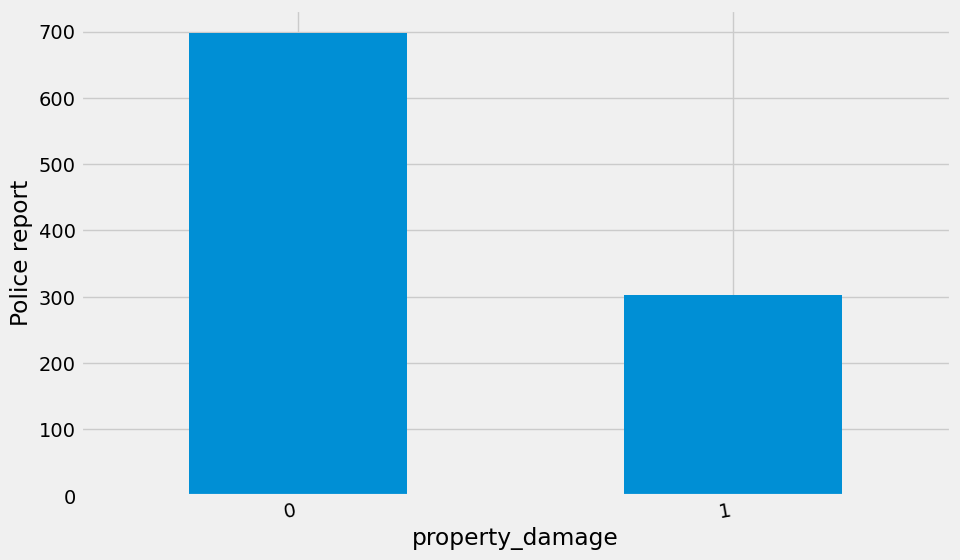

In [76]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax= X.groupby('property_damage').police_report_available.count().plot.bar(ylim=0)
ax.set_ylabel('Police report')
ax.set_xticklabels(ax.get_xticklabels(), rotation=10, ha="right")
plt.show()

In [77]:
X.columns

Index(['policy_state_IL', 'policy_state_IN', 'policy_state_OH',
       'insured_sex_FEMALE', 'insured_sex_MALE',
       'insured_education_level_Associate', 'insured_education_level_College',
       'insured_education_level_High School', 'insured_education_level_JD',
       'insured_education_level_MD',
       ...
       'capital-loss', 'number_of_vehicles_involved', 'bodily_injuries',
       'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim', 'fraud_reported', 'vehicle_age'],
      dtype='object', length=165)

In [78]:
X = X.drop(columns = ['fraud_reported'])  # dropping target variable 'fraud_reported'
X.columns

Index(['policy_state_IL', 'policy_state_IN', 'policy_state_OH',
       'insured_sex_FEMALE', 'insured_sex_MALE',
       'insured_education_level_Associate', 'insured_education_level_College',
       'insured_education_level_High School', 'insured_education_level_JD',
       'insured_education_level_MD',
       ...
       'capital-gains', 'capital-loss', 'number_of_vehicles_involved',
       'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'vehicle_age'],
      dtype='object', length=164)

##### We now have a dataset that we could use to evaluate an algorithm sensitive to missing values like LDA.

In [79]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# evaluate an LDA model on the dataset using k-fold cross validation
model = LinearDiscriminantAnalysis()
kfold = KFold(n_splits=5, random_state=None)
result = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
print(result.mean())

0.8390000000000001


In [80]:
print("Accuracy: %0.2f (+/- %0.2f)" % (result.mean(), result.std() * 2))

Accuracy: 0.84 (+/- 0.08)


## Original Data split

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=7)
print('length of X_train and X_test: ', len(X_train), len(X_test))
print('length of y_train and y_test: ', len(y_train), len(y_test))

length of X_train and X_test:  800 200
length of y_train and y_test:  800 200


In [82]:
print(f'Ogi Data TrainDist for fraud and genuine claim:\n{y_train.value_counts()} \n\nOgi Data TestDist for fraud and genuine claim:\n{y_test.value_counts()}')

Ogi Data TrainDist for fraud and genuine claim:
0    604
1    196
Name: fraud_reported, dtype: int64 

Ogi Data TestDist for fraud and genuine claim:
0    149
1     51
Name: fraud_reported, dtype: int64


### Standardizing the ogi data

In [84]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)
print(f'X_train_scaled size:{x_train_scaled.shape}, X_test_scaled size: {x_test_scaled.shape}')

X_train_scaled size:(800, 164), X_test_scaled size: (200, 164)


In [85]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns = X_train.columns) # retaining columns names
x_train_scaled.head(2)

,policy_state_IL,policy_state_IN,policy_state_OH,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,...,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,vehicle_age
0,0.0,0.0,2.088161,0.0,2.006033,0.0,0.0,2.685971,0.0,0.0,...,0.0000,-2.171862,0.980864,1.229787,1.799726,1.644157,0.901702,0.903754,1.840932,1.814304
1,0.0,0.0,2.088161,0.0,2.006033,0.0,0.0,2.685971,0.0,0.0,...,1.8834,-1.436117,2.942591,1.229787,1.799726,1.911286,2.096404,2.101175,1.605023,2.144178


LR: 0.825000 (0.032596)
[14:07:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:07:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:07:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:07:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:07:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:07:10] WARNING: /home

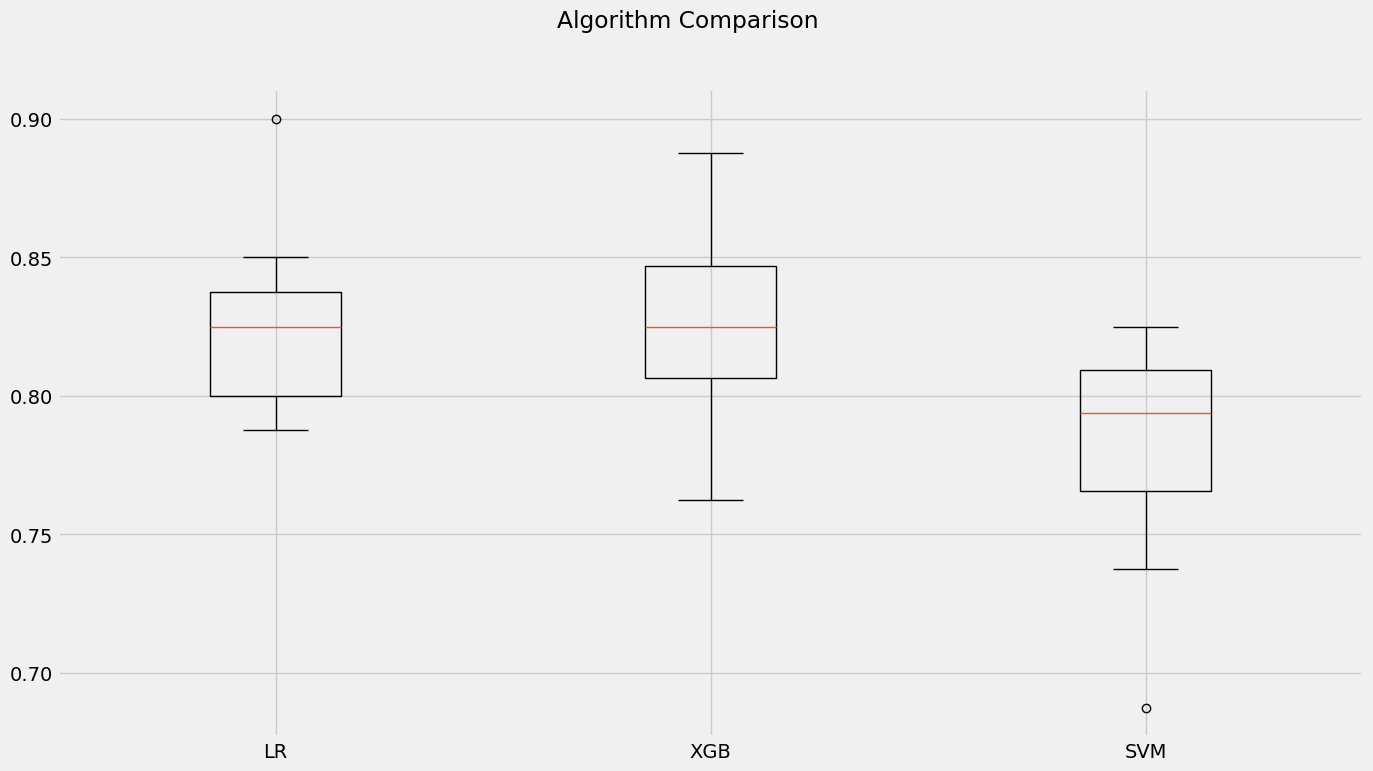

In [86]:
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.model_selection import KFold, cross_val_score
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, classification_report, cohen_kappa_score
from sklearn import metrics 


xgb = XGBClassifier()
logreg= LogisticRegressionCV(solver='lbfgs', cv=10)
knn = KNeighborsClassifier(5)
svcl = SVC()
adb = AdaBoostClassifier()
dt = DecisionTreeClassifier(max_depth=5)
rf = RandomForestClassifier()
lda = LinearDiscriminantAnalysis()
gnb = GaussianNB()

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegressionCV(solver='lbfgs', max_iter=5000, cv=10)))
models.append(('XGB', XGBClassifier()))
models.append(('SVM', SVC(gamma='auto')))

              
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=None)
    cv_results = model_selection.cross_val_score(model, x_train_scaled, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
   

# boxplot algorithm comparison
plt.rcParams['figure.figsize'] = [15, 8]              
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [87]:
models = []
models.append(('LR', LogisticRegressionCV(solver='lbfgs', max_iter=5000, cv=10)))
models.append(('XGB', XGBClassifier()))
models.append(('SVM', SVC(gamma='auto')))
results = []
names = []
scoring = 'f1'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=None)
    cv_results = model_selection.cross_val_score(model, x_train_scaled, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.601485 (0.112841)
[14:07:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:07:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:07:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:07:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:07:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:07:33] WARNING: /home

In [88]:
clf1= LogisticRegressionCV(solver='lbfgs', max_iter=5000, cv=10)
clf2 = XGBClassifier() 

clf = [
    ('LR', clf1), 
    ('XGB', clf2)] 
    
#create our voting classifier, inputting our models
eclf= VotingClassifier(estimators=[
    ('LR', clf1), 
    ('XGB', clf2)], voting='hard')

for clf, label in zip([clf1, clf2, eclf], [
    'Logistic Regression', 
    'XGB Classifier',
    'Ensemble']):
    
    scores = cross_val_score(clf, x_train_scaled, y_train, cv=10, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))    

Accuracy: 0.82 (+/- 0.03) [Logistic Regression]
[14:07:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:07:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:07:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:07:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:07:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:07:56] WARNING: /home

/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:07:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:08:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:08:04] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:08:06] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:08:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:08:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:08:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:08:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:08:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:08:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.81 (+/- 0.03) [Ensemble]


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


#### We see here, votingClassifier seleted LR as best class with the accuracy score 84%.

### XGBClassifier-GridSearch

In [91]:
from numpy import sort
from sklearn.feature_selection import SelectFromModel

# fit model on all training data
xgb = XGBClassifier(use_label_encoder=False,eval_metric='auc')
xgb.fit(x_train_scaled, y_train)

# make predictions for test data and evaluate
xgb_pred = xgb.predict(x_test_scaled)
predictions = [round(value) for value in xgb_pred]
accuracy = accuracy_score(y_test, xgb_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Fit model using each importance as a threshold
thresholds = sort(xgb.feature_importances_)
for thresh in thresholds:
    
    # select features using threshold
    selection = SelectFromModel(xgb, threshold=thresh, prefit=True)
    select_X_train = selection.transform(x_train_scaled)
    
    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train,eval_metric='auc')
    
    # eval model
    select_X_test = selection.transform(x_test_scaled)
    xgb_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in xgb_pred]
    accuracy = accuracy_score(y_test, xgb_pred)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Accuracy: 78.50%
Thresh=0.000, n=164, Accuracy: 78.50%


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.000, n=164, Accuracy: 78.50%
Thresh=0.000, n=164, Accuracy: 78.50%


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.000, n=164, Accuracy: 78.50%
Thresh=0.000, n=164, Accuracy: 78.50%


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.000, n=164, Accuracy: 78.50%
Thresh=0.000, n=164, Accuracy: 78.50%


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.000, n=164, Accuracy: 78.50%
Thresh=0.000, n=164, Accuracy: 78.50%


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.000, n=164, Accuracy: 78.50%
Thresh=0.000, n=164, Accuracy: 78.50%


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.000, n=164, Accuracy: 78.50%
Thresh=0.000, n=164, Accuracy: 78.50%


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.000, n=164, Accuracy: 78.50%
Thresh=0.000, n=164, Accuracy: 78.50%


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.000, n=164, Accuracy: 78.50%
Thresh=0.000, n=164, Accuracy: 78.50%


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.000, n=164, Accuracy: 78.50%
Thresh=0.000, n=164, Accuracy: 78.50%


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.000, n=164, Accuracy: 78.50%
Thresh=0.000, n=164, Accuracy: 78.50%


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.000, n=164, Accuracy: 78.50%
Thresh=0.000, n=164, Accuracy: 78.50%


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.000, n=164, Accuracy: 78.50%
Thresh=0.000, n=164, Accuracy: 78.50%


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.000, n=164, Accuracy: 78.50%
Thresh=0.000, n=164, Accuracy: 78.50%


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.000, n=164, Accuracy: 78.50%
Thresh=0.000, n=164, Accuracy: 78.50%


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.000, n=164, Accuracy: 78.50%
Thresh=0.000, n=164, Accuracy: 78.50%


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.000, n=164, Accuracy: 78.50%
Thresh=0.000, n=164, Accuracy: 78.50%


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.000, n=164, Accuracy: 78.50%
Thresh=0.000, n=164, Accuracy: 78.50%


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.000, n=164, Accuracy: 78.50%
Thresh=0.000, n=164, Accuracy: 78.50%


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.000, n=164, Accuracy: 78.50%
Thresh=0.000, n=164, Accuracy: 78.50%


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.000, n=164, Accuracy: 78.50%
Thresh=0.000, n=164, Accuracy: 78.50%


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.000, n=164, Accuracy: 78.50%
Thresh=0.000, n=164, Accuracy: 78.50%


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.000, n=164, Accuracy: 78.50%
Thresh=0.000, n=164, Accuracy: 78.50%


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.000, n=164, Accuracy: 78.50%
Thresh=0.000, n=164, Accuracy: 78.50%


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.000, n=164, Accuracy: 78.50%
Thresh=0.000, n=164, Accuracy: 78.50%


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.000, n=164, Accuracy: 78.50%
Thresh=0.000, n=164, Accuracy: 78.50%


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.000, n=164, Accuracy: 78.50%
Thresh=0.000, n=164, Accuracy: 78.50%


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.000, n=164, Accuracy: 78.50%
Thresh=0.000, n=164, Accuracy: 78.50%


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.000, n=164, Accuracy: 78.50%
Thresh=0.000, n=164, Accuracy: 78.50%


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.000, n=164, Accuracy: 78.50%
Thresh=0.000, n=164, Accuracy: 78.50%


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.000, n=164, Accuracy: 78.50%
Thresh=0.000, n=164, Accuracy: 78.50%


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.000, n=164, Accuracy: 78.50%
Thresh=0.000, n=164, Accuracy: 78.50%


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.000, n=164, Accuracy: 78.50%
Thresh=0.000, n=164, Accuracy: 78.50%


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.001, n=99, Accuracy: 78.50%
Thresh=0.001, n=98, Accuracy: 79.00%


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.001, n=97, Accuracy: 79.00%
Thresh=0.002, n=96, Accuracy: 80.00%


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.002, n=95, Accuracy: 80.00%
Thresh=0.002, n=94, Accuracy: 78.50%


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.002, n=93, Accuracy: 80.00%
Thresh=0.002, n=92, Accuracy: 78.50%


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.002, n=91, Accuracy: 79.00%
Thresh=0.003, n=90, Accuracy: 77.50%


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.003, n=89, Accuracy: 79.00%
Thresh=0.003, n=88, Accuracy: 79.00%


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.003, n=87, Accuracy: 79.50%
Thresh=0.003, n=86, Accuracy: 78.50%


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.003, n=85, Accuracy: 80.50%
Thresh=0.004, n=84, Accuracy: 79.50%


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.004, n=83, Accuracy: 79.50%
Thresh=0.004, n=82, Accuracy: 78.00%


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.004, n=81, Accuracy: 78.50%
Thresh=0.004, n=80, Accuracy: 80.00%


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.004, n=79, Accuracy: 80.00%
Thresh=0.004, n=78, Accuracy: 78.50%


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.004, n=77, Accuracy: 80.00%
Thresh=0.005, n=76, Accuracy: 78.00%


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.005, n=75, Accuracy: 79.50%
Thresh=0.005, n=74, Accuracy: 80.00%


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.005, n=73, Accuracy: 79.00%
Thresh=0.005, n=72, Accuracy: 81.00%


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.005, n=71, Accuracy: 81.00%
Thresh=0.005, n=70, Accuracy: 79.50%


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.005, n=69, Accuracy: 81.00%
Thresh=0.005, n=68, Accuracy: 81.00%


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.005, n=67, Accuracy: 80.00%
Thresh=0.005, n=66, Accuracy: 79.00%


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.005, n=65, Accuracy: 79.00%
Thresh=0.005, n=64, Accuracy: 79.50%
Thresh=0.005, n=63, Accuracy: 80.50%


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/pyth

Thresh=0.006, n=62, Accuracy: 79.00%
Thresh=0.006, n=61, Accuracy: 80.00%


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/pyth

Thresh=0.006, n=60, Accuracy: 79.00%
Thresh=0.006, n=59, Accuracy: 79.50%
Thresh=0.006, n=58, Accuracy: 82.00%


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.006, n=57, Accuracy: 81.50%
Thresh=0.006, n=56, Accuracy: 82.00%
Thresh=0.006, n=55, Accuracy: 82.00%


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/pyth

Thresh=0.006, n=54, Accuracy: 82.00%
Thresh=0.006, n=53, Accuracy: 82.50%
Thresh=0.006, n=52, Accuracy: 80.50%


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/pyth

Thresh=0.007, n=51, Accuracy: 82.50%
Thresh=0.007, n=50, Accuracy: 79.50%
Thresh=0.007, n=49, Accuracy: 79.50%


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/pyth

Thresh=0.007, n=48, Accuracy: 76.50%
Thresh=0.007, n=47, Accuracy: 77.50%
Thresh=0.007, n=46, Accuracy: 80.00%


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/pyth

Thresh=0.007, n=45, Accuracy: 80.00%
Thresh=0.007, n=44, Accuracy: 81.00%
Thresh=0.008, n=43, Accuracy: 80.50%


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/pyth

Thresh=0.008, n=42, Accuracy: 79.50%
Thresh=0.008, n=41, Accuracy: 79.50%
Thresh=0.008, n=40, Accuracy: 79.50%


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/pyth

Thresh=0.008, n=39, Accuracy: 80.50%
Thresh=0.009, n=38, Accuracy: 80.00%
Thresh=0.009, n=37, Accuracy: 80.00%


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/pyth

Thresh=0.009, n=36, Accuracy: 79.50%
Thresh=0.009, n=35, Accuracy: 81.00%
Thresh=0.009, n=34, Accuracy: 80.00%


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/pyth

Thresh=0.009, n=33, Accuracy: 80.00%
Thresh=0.009, n=32, Accuracy: 83.50%
Thresh=0.010, n=31, Accuracy: 81.50%
Thresh=0.011, n=30, Accuracy: 81.00%


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/pyth

Thresh=0.011, n=29, Accuracy: 81.00%
Thresh=0.012, n=28, Accuracy: 81.00%
Thresh=0.012, n=27, Accuracy: 80.50%
Thresh=0.012, n=26, Accuracy: 80.50%


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/pyth

Thresh=0.013, n=25, Accuracy: 81.00%
Thresh=0.013, n=24, Accuracy: 82.00%
Thresh=0.014, n=23, Accuracy: 80.50%
Thresh=0.014, n=22, Accuracy: 82.00%


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/pyth

Thresh=0.015, n=21, Accuracy: 83.00%
Thresh=0.015, n=20, Accuracy: 81.50%
Thresh=0.015, n=19, Accuracy: 81.50%
Thresh=0.016, n=18, Accuracy: 81.50%


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/pyth

Thresh=0.016, n=17, Accuracy: 84.50%
Thresh=0.016, n=16, Accuracy: 84.50%
Thresh=0.016, n=15, Accuracy: 84.00%
Thresh=0.017, n=14, Accuracy: 83.00%


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/pyth

Thresh=0.017, n=13, Accuracy: 83.50%
Thresh=0.018, n=12, Accuracy: 83.50%
Thresh=0.018, n=11, Accuracy: 83.00%
Thresh=0.019, n=10, Accuracy: 82.00%


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/pyth

Thresh=0.019, n=9, Accuracy: 83.00%
Thresh=0.020, n=8, Accuracy: 83.00%
Thresh=0.023, n=7, Accuracy: 82.00%
Thresh=0.025, n=6, Accuracy: 82.50%
Thresh=0.025, n=5, Accuracy: 82.50%


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/pyth

Thresh=0.039, n=4, Accuracy: 82.50%
Thresh=0.049, n=3, Accuracy: 83.00%
Thresh=0.053, n=2, Accuracy: 81.00%
Thresh=0.070, n=1, Accuracy: 79.00%


/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/dravich/.conda/envs/DBT_pytorch/lib/pyth

In [92]:
#### Checking the important features the XGB model has identified

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

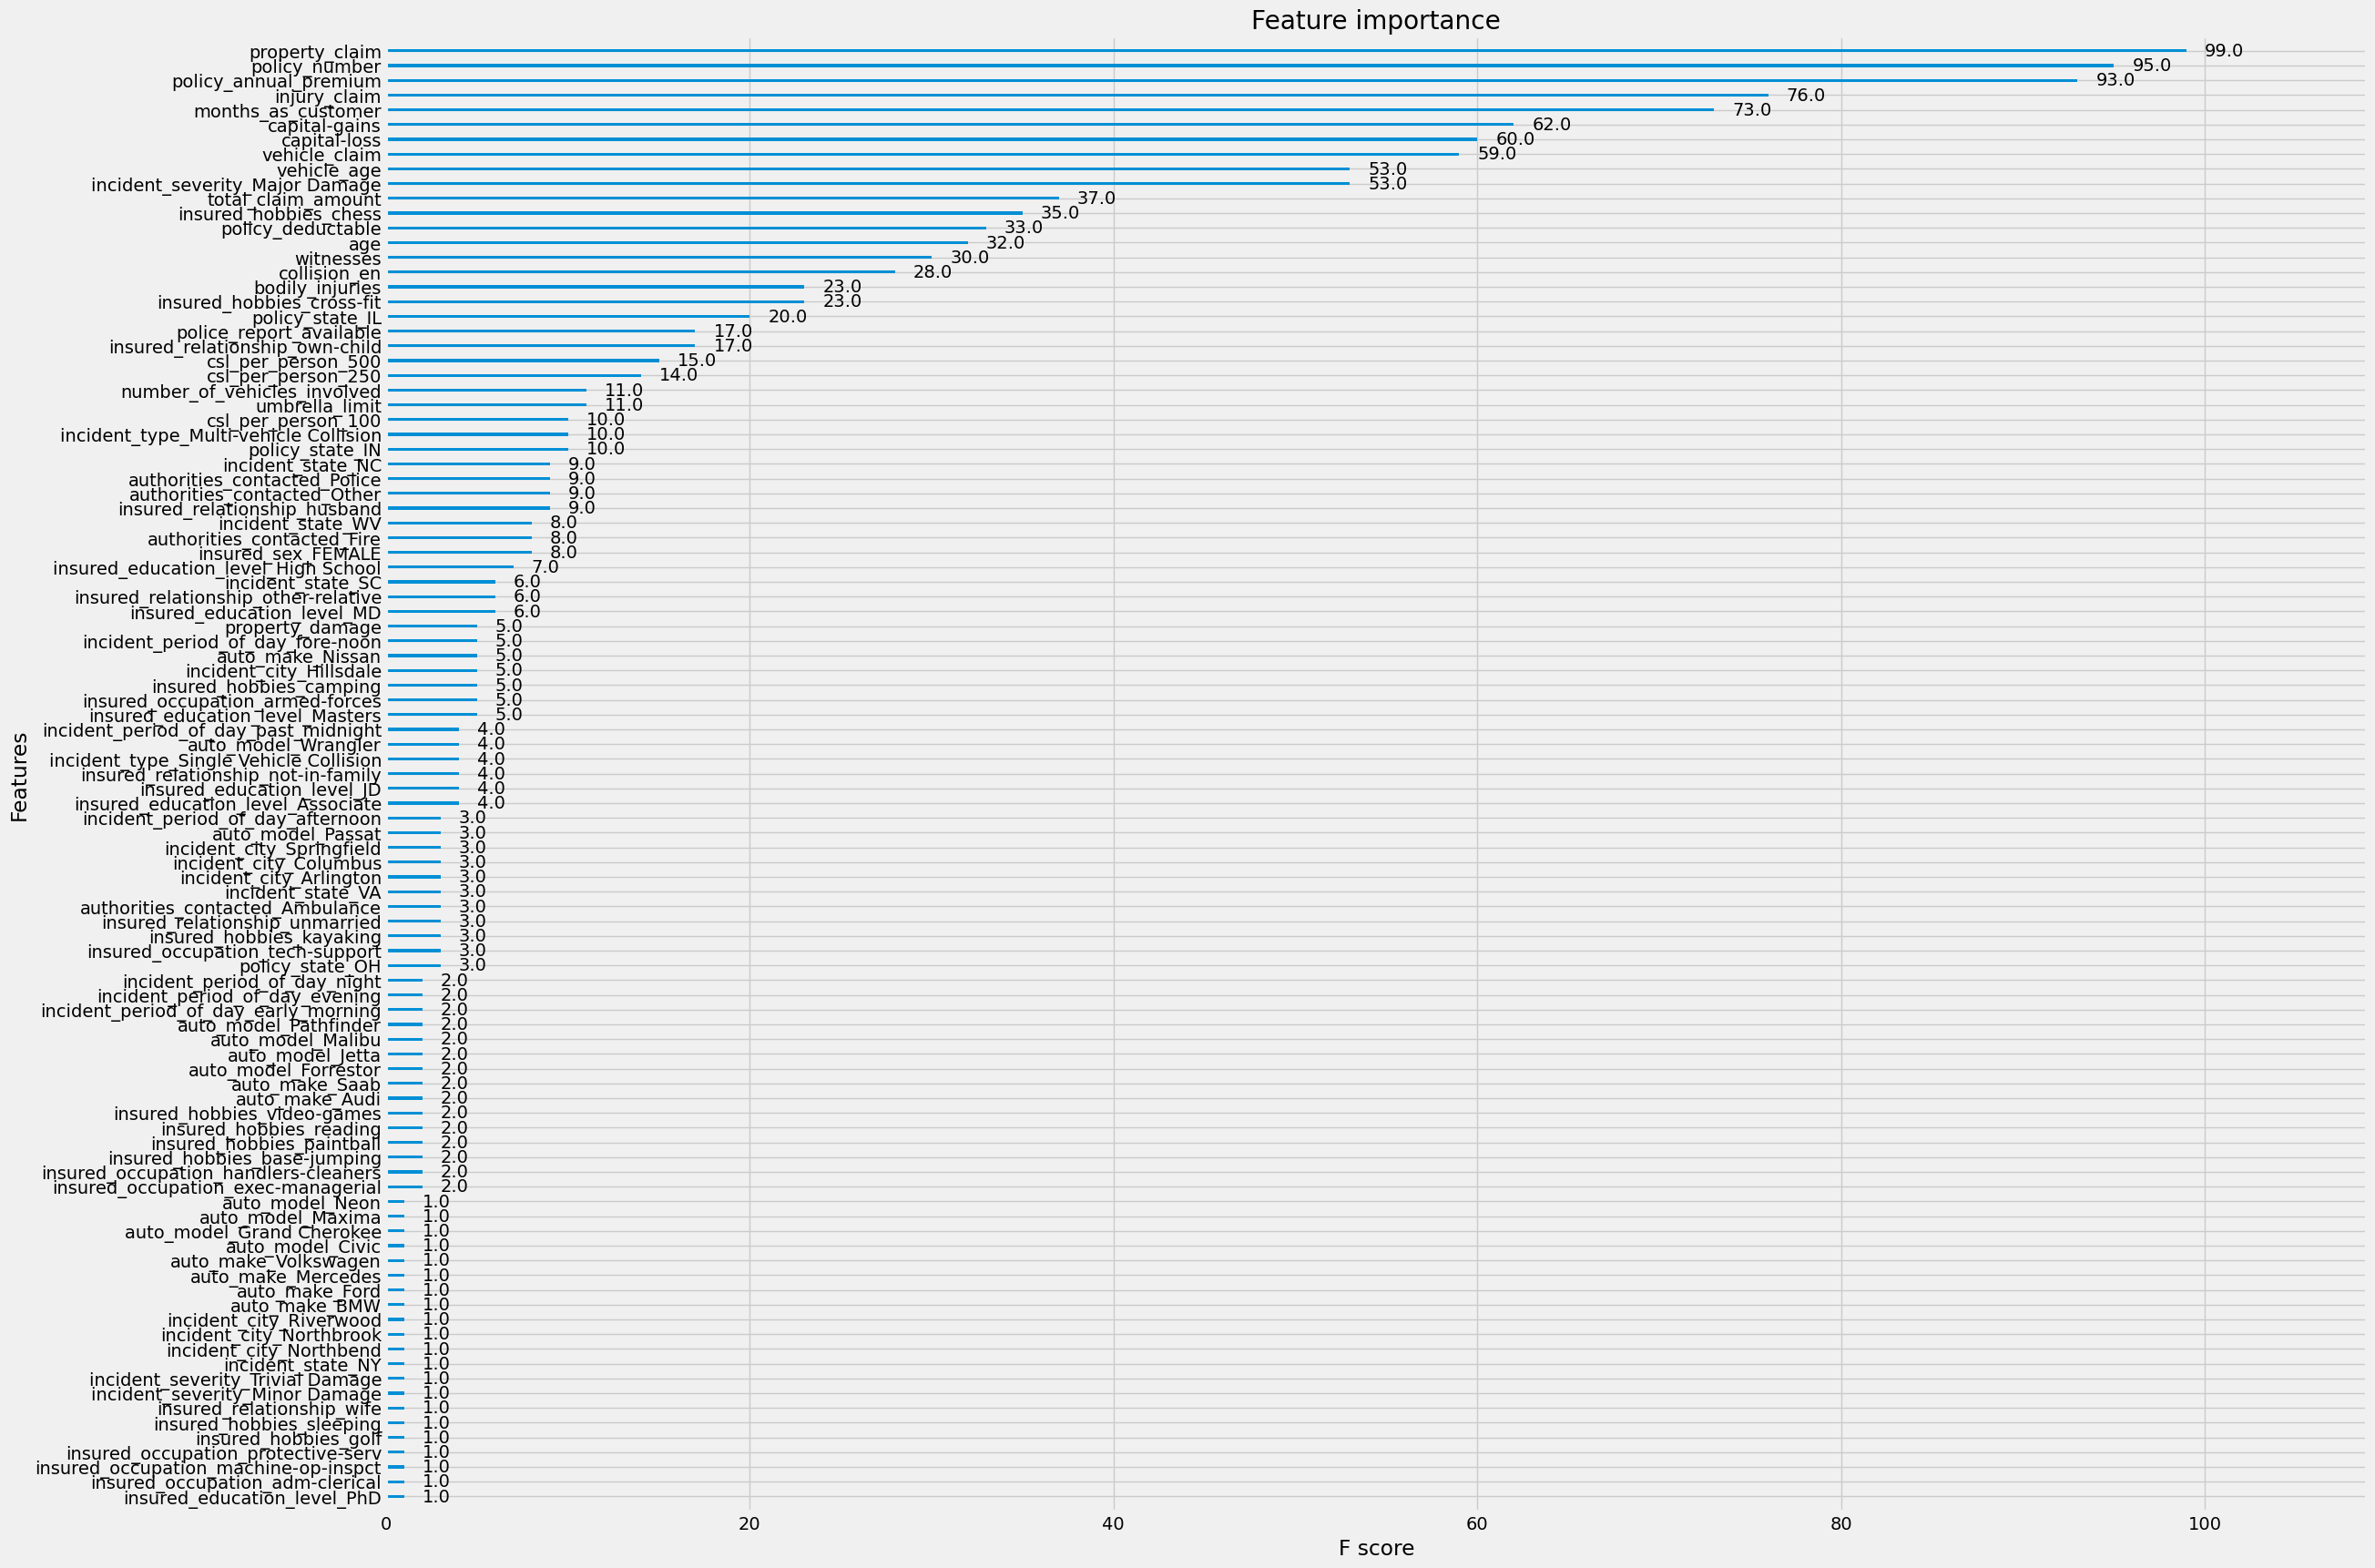

In [93]:
from xgboost import plot_importance
xg = XGBClassifier(use_label_encoder=False)
xg.fit(x_train_scaled, y_train,eval_metric='auc') # fitting the model again on dataframe to identify the feature names

plt.rcParams['figure.figsize'] = [25, 20]
# plot feature importance
plot_importance(xg)

In [94]:
from pprint import pprint
# Check parameters used 
print('Parameters currently in use:\n')
pprint(xg.get_params())

Parameters currently in use:

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'enable_categorical': False,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 16,
 'num_parallel_tree': 1,
 'objective': 'binary:logistic',
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'use_label_encoder': False,
 'validate_parameters': 1,
 'verbosity': None}


In [95]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot
plt.rcParams['figure.figsize'] = [10, 6]

# grid search
max_depth = range(1, 11, 2)
print(max_depth)

param_grid = dict(max_depth=max_depth)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(xgb, param_grid, scoring="neg_log_loss", n_jobs=12, cv=kfold, verbose=1)
grid_result = grid_search.fit(x_train_scaled, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


# plot
pyplot.errorbar(max_depth, means, yerr=stds)
pyplot.title("XGBoost max_depth vs Log Loss")
pyplot.xlabel('max_depth')
pyplot.ylabel('Log Loss')

range(1, 11, 2)
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:   10.9s
[Parallel(n_jobs=12)]: Done  50 out of  50 | elapsed:   17.7s finished


Best: -0.384890 using {'max_depth': 1}
-0.384890 (0.074334) with: {'max_depth': 1}
-0.466632 (0.101334) with: {'max_depth': 3}
-0.549942 (0.170275) with: {'max_depth': 5}
-0.527336 (0.180163) with: {'max_depth': 7}
-0.531989 (0.148887) with: {'max_depth': 9}


Text(0, 0.5, 'Log Loss')

##### We can see the log loss for each max_depth. The optimal configuration is max_depth=1 resulting in a log loss of 0.365.

In [96]:
import numpy

n_estimators = [50, 100, 150, 200]
max_depth = [1,2, 4, 6, 8]
print(max_depth)
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(xgb, param_grid, scoring="neg_log_loss", n_jobs=12, cv=kfold, verbose=1)
grid_result = grid_search.fit(x_train_scaled, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# plot results
scores = numpy.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    pyplot.plot(n_estimators, scores[i], label='depth: ' + str(value))
pyplot.legend()
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')

[1, 2, 4, 6, 8]
Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    4.2s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:   46.5s
[Parallel(n_jobs=12)]: Done 200 out of 200 | elapsed:   57.4s finished


Best: -0.374364 using {'max_depth': 1, 'n_estimators': 50}
-0.374364 (0.064140) with: {'max_depth': 1, 'n_estimators': 50}
-0.384890 (0.074334) with: {'max_depth': 1, 'n_estimators': 100}
-0.394007 (0.078657) with: {'max_depth': 1, 'n_estimators': 150}
-0.404209 (0.082847) with: {'max_depth': 1, 'n_estimators': 200}
-0.392681 (0.074873) with: {'max_depth': 2, 'n_estimators': 50}
-0.424578 (0.090614) with: {'max_depth': 2, 'n_estimators': 100}
-0.459817 (0.103364) with: {'max_depth': 2, 'n_estimators': 150}
-0.489546 (0.112024) with: {'max_depth': 2, 'n_estimators': 200}
-0.450115 (0.100876) with: {'max_depth': 4, 'n_estimators': 50}
-0.530566 (0.154494) with: {'max_depth': 4, 'n_estimators': 100}
-0.582150 (0.168582) with: {'max_depth': 4, 'n_estimators': 150}
-0.605510 (0.181152) with: {'max_depth': 4, 'n_estimators': 200}
-0.487725 (0.145614) with: {'max_depth': 6, 'n_estimators': 50}
-0.543981 (0.176936) with: {'max_depth': 6, 'n_estimators': 100}
-0.574890 (0.186007) with: {'max_de

Text(22.33333333333333, 0.5, 'Log Loss')

##### We  see here that, the best result was achieved with a n_estimators=50 and max_depth=2.
### Random Hyperparameter Grid

In [97]:
xgb = XGBClassifier(objective='binary:logistic', random_state=7, n_jobs=-1, use_label_encoder=False,eval_metric='auc')
xgb.fit(x_train_scaled, y_train,eval_metric='auc')
scores = cross_val_score(xgb, x_train_scaled, y_train, cv=kfold)
print('Brier loss:', "{0:.5f}".format(np.mean(scores)*-1))

Brier loss: -0.81625


In [98]:
print(xgb.get_params())

{'objective': 'binary:logistic', 'use_label_encoder': False, 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'enable_categorical': False, 'gamma': 0, 'gpu_id': -1, 'importance_type': None, 'interaction_constraints': '', 'learning_rate': 0.300000012, 'max_delta_step': 0, 'max_depth': 6, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 100, 'n_jobs': -1, 'num_parallel_tree': 1, 'predictor': 'auto', 'random_state': 7, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None, 'eval_metric': 'auc'}


In [99]:
from sklearn.model_selection import RandomizedSearchCV

# Create the parameter grid
params = {
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.300000012,0.5],
    'n_estimators': [int(x) for x in np.linspace(start=50, stop=500, num=10)],
    'max_depth': [i for i in range(3, 10)],
    'min_child_weight': [i for i in range(1, 7)],
    'subsample': [i/10.0 for i in range(1,5)],
    'colsample_bytree': [i/10.0 for i in range(1,5)]
}
 
# Create the randomised grid search model
# "n_iter = number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution"
rgs = RandomizedSearchCV(estimator=xgb, param_distributions=params, n_iter=200, cv=kfold, 
                         random_state=7, n_jobs=-1, return_train_score=True)
# Fit rgs
rgs.fit(x_train_scaled, y_train)
 
# Print results
print(rgs)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=7, shuffle=True),
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           enable_categorical=False,
                                           eval_metric='auc', gamma=0,
                                           gpu_id=-1, importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_d...
                                           validate_parameters=1,
                                           verbosity=None),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'colsample_bytre

In [100]:
best_score = rgs.best_score_
best_params = rgs.best_params_
print("Best score: {}".format(best_score))
print("Best params: ")
for param_name in sorted(best_params.keys()):
    print('%s: %r' % (param_name, best_params[param_name]))

Best score: 0.80375
Best params: 
colsample_bytree: 0.1
learning_rate: 0.1
max_depth: 7
min_child_weight: 6
n_estimators: 400
subsample: 0.2


In [101]:
def confusionMat(y_test,y_pred):
    cm = sklearn.metrics.confusion_matrix(y_test, y_pred, normalize='all')
    conMat =pd.DataFrame(cm)
    conMat.rename(columns={0: 'Predicted Genuine Claim', 1: 'Predicted Fraud Claim'}, inplace=True)
    conMat.rename({0: 'Actual Genuine Claim', 1: 'Actual Fraud Claim'}, axis=0, inplace=True)
    conMat.style.set_table_styles([{'selector':'','props':[('border','4px solid #7a7')]}])
    return conMat

In [104]:
xg_optim = XGBClassifier(booster='gbtree', colsample_bytree=0.8, gamma=0, learning_rate=0.0001, max_depth=6, 
                         min_child_weight=2, n_estimators=350, n_jobs=1, subsample=1, verbosity=None) 
xg_optim.fit(x_train_scaled,y_train,eval_metric='auc')
xg_pred_train = xg_optim.predict(x_train_scaled)
print('Train Accuracy: ', round(accuracy_score(y_train, xg_pred_train)*100, 2))
xg_pred = xg_optim.predict(x_test_scaled)
print('\nTest Accuracy: ', round(accuracy_score(y_test, xg_pred)*100, 2))

Train Accuracy:  92.12

Test Accuracy:  82.0


In [105]:
print('Cohen Kappa: '+ str(np.round(cohen_kappa_score(y_test, xg_pred),3)))
print('Recall: ', round(recall_score(y_test, xg_pred)*100, 2))

Cohen Kappa: 0.549
Recall:  72.55


In [106]:
print('\n Classification Report:\n', classification_report(y_test, xg_pred))
print('\n Confusion Matrix:\n', confusionMat(y_test, xg_pred))
print('\n F-beta score focusing on Accuracy:',sklearn.metrics.fbeta_score(y_test, xg_pred, beta = 0.5))
print('\n F-beta score focusing on Recall:',sklearn.metrics.fbeta_score(y_test, xg_pred, beta = 2))
R2 = sklearn.metrics.r2_score(y_test, xg_pred)
MSE = sklearn.metrics.mean_squared_error(y_test, xg_pred)
RMS = math.sqrt(MSE)
print('\n R2 Score:',R2)
print('\n MSE Score:',MSE)
print('\n RMS Score:',RMS)



 Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.85      0.88       149
           1       0.63      0.73      0.67        51

    accuracy                           0.82       200
   macro avg       0.76      0.79      0.77       200
weighted avg       0.83      0.82      0.82       200


 Confusion Matrix:
                       Predicted Genuine Claim  Predicted Fraud Claim
Actual Genuine Claim                    0.635                  0.110
Actual Fraud Claim                      0.070                  0.185

 F-beta score focusing on Accuracy: 0.6445993031358884

 F-beta score focusing on Recall: 0.7034220532319391

 R2 Score: 0.05250690880378994

 MSE Score: 0.18

 RMS Score: 0.4242640687119285


In [107]:
R2 = sklearn.metrics.r2_score(y_test, xg_pred)
MSE = sklearn.metrics.mean_squared_error(y_test, xg_pred)
RMS = math.sqrt(MSE)
print('\n R2 Score:',R2)
print('\n MSE Score:',MSE)
print('\n RMS Score:',RMS)



 R2 Score: 0.05250690880378994

 MSE Score: 0.18

 RMS Score: 0.4242640687119285


In [108]:
print('AUC score:',sklearn.metrics.roc_auc_score(y_test, xg_pred, average=None))
# plot_roc_curve(y_test, xg_pred)   

AUC score: 0.788919594683511


In [117]:
X_test_scaledDF = pd.DataFrame(x_test_scaled, columns = X_test.columns) # retaining columns names
X_test_scaledDF.head(2)

,policy_state_IL,policy_state_IN,policy_state_OH,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,...,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,vehicle_age
0,2.11,0.00,0.00,0.00,2.01,0.00,0.00,0.00,0.00,0.00,...,2.15,0.00,2.94,2.46,1.80,2.28,1.04,3.13,2.12,2.47
1,0.00,0.00,2.09,0.00,2.01,0.00,3.11,0.00,0.00,0.00,...,1.39,-1.72,0.98,0.00,0.00,2.01,0.00,1.38,2.46,2.31


## Lazy Classifer for Ogi Data

In [118]:
from lazypredict.Supervised import LazyClassifier, LazyRegressor
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(x_train_scaled, X_test_scaledDF, y_train, y_test)

 97%|█████████▋| 28/29 [00:02<00:00, 14.41it/s]

[14:44:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|██████████| 29/29 [00:02<00:00, 11.81it/s]


In [119]:
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
BaggingClassifier                  0.85               0.84     0.84      0.85   
LinearDiscriminantAnalysis         0.82               0.78     0.78      0.82   
AdaBoostClassifier                 0.83               0.77     0.77      0.83   
RidgeClassifierCV                  0.81               0.76     0.76      0.81   
RidgeClassifier                    0.81               0.75     0.75      0.81   
BernoulliNB                        0.79               0.75     0.75      0.79   
NearestCentroid                    0.72               0.75     0.75      0.74   
LogisticRegression                 0.81               0.73     0.73      0.80   
LinearSVC                          0.80               0.73     0.73      0.80   
LGBMClassifier                     0.79               0.72     0.72      0.79   
XGBClassifier               

### Ridge Classifer

In [120]:
# Ridge Classifier CV
from sklearn.linear_model import RidgeClassifier
ridger = RidgeClassifier()

r_values = {'solver': ['auto']}

    
ridge = RandomizedSearchCV(ridger, r_values, cv=8, n_jobs = -1, random_state=50)
ridge.fit(x_train_scaled, y_train)
print(ridge.best_params_)


{'solver': 'auto'}


In [121]:
# Ridge Classifier CV
from sklearn.linear_model import RidgeClassifierCV
   
ridgeCV = RidgeClassifierCV( alphas= [1e-3, 1e-2, 1e-1,1,2], fit_intercept= True,cv=8)
ridgeCV.fit(x_train_scaled, y_train)


RidgeClassifierCV(alphas=array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 2.e+00]), cv=8)

In [122]:
ridPred = ridge.predict(x_test_scaled)
print('RidgeClassifer Score:',ridge.score(x_test_scaled, y_test))
ridCVPred = ridgeCV.predict(x_test_scaled)
print('RidgeClassifer CV Score:',ridgeCV.score(x_test_scaled, y_test))

RidgeClassifer Score: 0.805
RidgeClassifer CV Score: 0.805


In [123]:
rid_pred_train = ridge.predict(x_train_scaled)
print('Train Accuracy: ', round(accuracy_score(y_train, rid_pred_train)*100, 2))
print('Test Accuracy: ', round(accuracy_score(y_test, ridPred)*100, 2))

print('Cohen Kappa: '+ str(np.round(cohen_kappa_score(y_test, ridPred),3)))
print('Recall: ', round(recall_score(y_test, ridPred)*100, 2))
R2 = sklearn.metrics.r2_score(y_test, ridPred)
MSE = sklearn.metrics.mean_squared_error(y_test, ridPred)
RMS = math.sqrt(MSE)
print('\n R2 Score:',R2)
print('\n MSE Score:',MSE)
print('\n RMS Score:',RMS)

Train Accuracy:  90.0
Test Accuracy:  80.5
Cohen Kappa: 0.497
Recall:  64.71

 R2 Score: -0.02645084879589432

 MSE Score: 0.195

 RMS Score: 0.44158804331639234


In [124]:
print('\n Ridge Classification Report:\n', classification_report(y_test, ridPred))
print('\n Confusion Matrix:\n', confusionMat(y_test, ridPred))
print('\n F-beta score focusing on Accuracy:',sklearn.metrics.fbeta_score(y_test, ridPred, beta = 0.5))
print('\n F-beta score focusing on Recall:',sklearn.metrics.fbeta_score(y_test, ridPred, beta = 2))


 Ridge Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87       149
           1       0.61      0.65      0.63        51

    accuracy                           0.81       200
   macro avg       0.74      0.75      0.75       200
weighted avg       0.81      0.81      0.81       200


 Confusion Matrix:
                       Predicted Genuine Claim  Predicted Fraud Claim
Actual Genuine Claim                     0.64                   0.10
Actual Fraud Claim                       0.09                   0.17

 F-beta score focusing on Accuracy: 0.6179775280898877

 F-beta score focusing on Recall: 0.6395348837209303


## Bagging Classifer

In [125]:
#Bagging Classifer
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
Bclf = BaggingClassifier(base_estimator=SVC(),n_estimators=10, random_state=0)
Bclf.fit(x_train_scaled, y_train)

BaggingClassifier(base_estimator=SVC(), random_state=0)

In [127]:
BclfPred = Bclf.predict(x_test_scaled)
print('\n Bagging Classification Report:\n', classification_report(y_test, BclfPred))
print('\n Confusion Matrix:\n', confusionMat(y_test, BclfPred))
print('\n F-beta score focusing on Accuracy:',sklearn.metrics.fbeta_score(y_test, BclfPred, beta = 0.5))
print('\n F-beta score focusing on Recall:',sklearn.metrics.fbeta_score(y_test, BclfPred, beta = 2))


 Bagging Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.94      0.86       149
           1       0.62      0.29      0.40        51

    accuracy                           0.78       200
   macro avg       0.71      0.62      0.63       200
weighted avg       0.75      0.78      0.74       200


 Confusion Matrix:
                       Predicted Genuine Claim  Predicted Fraud Claim
Actual Genuine Claim                     0.70                   0.04
Actual Fraud Claim                       0.18                   0.07

 F-beta score focusing on Accuracy: 0.5102040816326531

 F-beta score focusing on Recall: 0.32894736842105265


In [129]:
BclfPred = Bclf.predict(x_test_scaled)
print('\n Bagging Classification Report:\n', classification_report(y_test, BclfPred))
print('\n Confusion Matrix:\n', confusionMat(y_test, BclfPred))
print('\n F-beta score focusing on Accuracy:',sklearn.metrics.fbeta_score(y_test, BclfPred, beta = 0.5))
print('\n F-beta score focusing on Recall:',sklearn.metrics.fbeta_score(y_test, BclfPred, beta = 2))


 Bagging Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.94      0.86       149
           1       0.62      0.29      0.40        51

    accuracy                           0.78       200
   macro avg       0.71      0.62      0.63       200
weighted avg       0.75      0.78      0.74       200


 Confusion Matrix:
                       Predicted Genuine Claim  Predicted Fraud Claim
Actual Genuine Claim                     0.70                   0.04
Actual Fraud Claim                       0.18                   0.07

 F-beta score focusing on Accuracy: 0.5102040816326531

 F-beta score focusing on Recall: 0.32894736842105265


In [130]:
param_grid = {
    'base_estimator__max_depth' : [1, 2, 3, 4, 5],
    'max_samples' : [0.05, 0.1, 0.2, 0.5]
}

BclfCV = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(),
                                     n_estimators = 100, max_features = 0.5),
                   param_grid, scoring = 'neg_log_loss')
BclfCV.fit(x_train_scaled, y_train)

GridSearchCV(estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                         max_features=0.5, n_estimators=100),
             param_grid={'base_estimator__max_depth': [1, 2, 3, 4, 5],
                         'max_samples': [0.05, 0.1, 0.2, 0.5]},
             scoring='neg_log_loss')

In [131]:
BclfCVPred = BclfCV.predict(x_test_scaled)
print('\n Bagging Classification GridSearchReport:\n', classification_report(y_test, BclfCVPred))
print('\n Confusion Matrix:\n', confusionMat(y_test, BclfCVPred))
print('\n F-beta score focusing on Accuracy:',sklearn.metrics.fbeta_score(y_test, BclfCVPred, beta = 0.5))
print('\n F-beta score focusing on Recall:',sklearn.metrics.fbeta_score(y_test, BclfCVPred, beta = 2))


 Bagging Classification GridSearchReport:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       149
           1       0.56      0.45      0.50        51

    accuracy                           0.77       200
   macro avg       0.69      0.67      0.68       200
weighted avg       0.76      0.77      0.76       200


 Confusion Matrix:
                       Predicted Genuine Claim  Predicted Fraud Claim
Actual Genuine Claim                     0.66                   0.09
Actual Fraud Claim                       0.14                   0.12

 F-beta score focusing on Accuracy: 0.5348837209302325

 F-beta score focusing on Recall: 0.46938775510204084


In [132]:
bagCV_pred_train = BclfCV.predict(x_train_scaled)
print('Train Accuracy: ', round(accuracy_score(y_train, bagCV_pred_train)*100, 2))
print('Test Accuracy: ', round(accuracy_score(y_test, BclfCVPred)*100, 2))

print('Cohen Kappa: '+ str(np.round(cohen_kappa_score(y_test, BclfCVPred),3)))
print('Recall: ', round(recall_score(y_test, BclfCVPred)*100, 2))
R2 = sklearn.metrics.r2_score(y_test, BclfCVPred)
MSE = sklearn.metrics.mean_squared_error(y_test, BclfCVPred)
RMS = math.sqrt(MSE)
print('\n R2 Score:',R2)
print('\n MSE Score:',MSE)
print('\n RMS Score:',RMS)

Train Accuracy:  94.12
Test Accuracy:  77.0
Cohen Kappa: 0.353
Recall:  45.1

 R2 Score: -0.21068561652849072

 MSE Score: 0.23

 RMS Score: 0.47958315233127197


## Implementation of SMOTE

In [133]:
from imblearn.over_sampling import SMOTE

In [134]:
oversample = SMOTE()
SmoteX,SomteY = oversample.fit_resample(X,y)
print('length of Smote-X and X: ', len(SmoteX), len(X))
print('length of Smote-y and y: ', len(SomteY), len(y))

length of Smote-X and X:  1506 1000
length of Smote-y and y:  1506 1000


In [135]:
X_Smotetrain, X_Smotetest, y_Smotetrain, y_Smotetest = train_test_split(SmoteX, SomteY, train_size=0.8, random_state=7)
print('length of Smote X_train and Smote X_test: ', len(X_Smotetrain), len(X_Smotetest))
print('length of Smote y_train and Smote y_test: ', len(y_Smotetrain), len(y_Smotetest))

length of Smote X_train and Smote X_test:  1204 302
length of Smote y_train and Smote y_test:  1204 302


In [136]:
print(f'Smote Data TrainDist for fraud and genuine claim:\n{y_Smotetrain.value_counts()} \n\nSMOTE Data TestDist for fraud and genuine claim:\n{y_Smotetest.value_counts()}')

Smote Data TrainDist for fraud and genuine claim:
0    606
1    598
Name: fraud_reported, dtype: int64 

SMOTE Data TestDist for fraud and genuine claim:
1    155
0    147
Name: fraud_reported, dtype: int64


In [137]:
X_Smotetrain.to_csv('./Processed_data/SmoteTrainDF.csv',index= False) 
y_Smotetrain.to_csv('./Processed_data/SmoteTrainDF.csv',index= False,mode='a') 
X_Smotetest.to_csv('./Processed_data/SmoteTestDF.csv',index= False) 
y_Smotetest.to_csv('./Processed_data/SmoteTestDF.csv',index= False,mode='a') 

### Standardizing the SMOTE data

In [138]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)

X_Smotetrain_scaled = scaler.fit_transform(X_Smotetrain)
X_Smotetest_scaled = scaler.transform(X_Smotetest)

print(f'X_train_scaled size:{X_Smotetrain_scaled.shape}, X_test_scaled size: {X_Smotetest_scaled.shape}')

X_train_scaled size:(1204, 164), X_test_scaled size: (302, 164)


In [139]:
X_Smotetrain_scaled = pd.DataFrame(X_Smotetrain_scaled, columns = X_Smotetrain.columns) # retaining columns names
X_Smotetest_scaled = pd.DataFrame(X_Smotetest_scaled, columns = X_Smotetest.columns)

In [140]:
X_Smotetrain_scaled.to_csv("./Processed_data/SmoteTrainDF_scaled.csv", index=False)
y_Smotetrain.to_csv("./Processed_data/SmoteTrainDF_scaled.csv", index=False, mode="a")
X_Smotetest_scaled.to_csv("./Processed_data/SmoteTestDF_scaled.csv", index=False)
y_Smotetest.to_csv("./Processed_data/SmoteTestDF_scaled.csv", index=False, mode="a")

### Random Forest Classification

In [141]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, classification_report, cohen_kappa_score
from sklearn import metrics 

# Baseline Random forest based Model
rfc = RandomForestClassifier(n_estimators=200)
    
kfold = KFold(n_splits=5, random_state=None)
result2 = cross_val_score(rfc, X_Smotetrain_scaled, y_Smotetrain, cv=kfold, scoring='f1')
print(result2.mean())

0.8674864091635683


In [142]:
rfc.fit(X_Smotetrain_scaled,y_Smotetrain)
rfc_pred = rfc.predict(X_Smotetest_scaled)
cm_rfc = sklearn.metrics.confusion_matrix(y_Smotetest, rfc_pred, normalize='all')
conMatRfc =pd.DataFrame(cm_rfc)
conMatRfc.rename(columns={0: 'Predicted Genuine Claim', 1: 'Predicted Fraud Claim'}, inplace=True)
conMatRfc.rename({0: 'Actual Genuine Claim', 1: 'Actual Fraud Claim'}, axis=0, inplace=True)

print('Accuracy: ', round(accuracy_score(y_Smotetest, rfc_pred)*100, 2))
print( 'Cohen Kappa: '+ str(np.round(cohen_kappa_score(y_Smotetest, rfc_pred),3)))
print('Recall: ', round(recall_score(y_Smotetest, rfc_pred)*100, 2))
print('\n Classification Report:\n', classification_report(y_Smotetest, rfc_pred))
print('\n Confusion Matrix:\n', conMatRfc)
print('\n F-beta score focusing on Accuracy:',sklearn.metrics.fbeta_score(y_Smotetest, rfc_pred, beta = 0.5))
print('\n F-beta score focusing on Recall:',sklearn.metrics.fbeta_score(y_Smotetest, rfc_pred, beta = 2))

Accuracy:  83.11
Cohen Kappa: 0.663
Recall:  80.0

 Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83       147
           1       0.86      0.80      0.83       155

    accuracy                           0.83       302
   macro avg       0.83      0.83      0.83       302
weighted avg       0.83      0.83      0.83       302


 Confusion Matrix:
                       Predicted Genuine Claim  Predicted Fraud Claim
Actual Genuine Claim                     0.42                   0.07
Actual Fraud Claim                       0.10                   0.41

 F-beta score focusing on Accuracy: 0.8481532147742817

 F-beta score focusing on Recall: 0.8115183246073299


#### Here, we see that, Random Forest baseline model unable to provide greater accuracy. We will check on ther classifier to compare. Before doing so,let's check if any anomalies/outliers are present in data.

In [143]:
# Generate a Histogram plot for anomaly detection
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = [15, 8]
df.plot(kind='hist')
plt.show()

#### The green bar standing tall and away from all, signifies anomalies in either of policy_annual_premium, witnesses or vehicle_age. Let's draw box-and-whisker plot on each to check the presence of outliers.

In [146]:
# Generate a Histogram plot on scaled data to check anomalies
plt.rcParams['figure.figsize'] = [15, 8]
X_Smotetrain_scaled.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

In [147]:
# import statsmodels.formula.api  as smf
# import statsmodels.api as sm

# formula = 'Direction ~ Lag1+Lag2+Lag3+Lag4+Lag5+Volume'
# glm = smf.glm(formula = formula, data=x_train_scaled, family=sm.families.Binomial())
# result = glm.fit()
# print(result.summary())

In [148]:
from lazypredict.Supervised import LazyClassifier, LazyRegressor
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(X_Smotetrain_scaled, X_Smotetest_scaled, y_Smotetrain, y_Smotetest)

 97%|█████████▋| 28/29 [00:03<00:00, 10.58it/s]

[14:47:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|██████████| 29/29 [00:03<00:00,  8.65it/s]


In [149]:
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LinearDiscriminantAnalysis         0.88               0.88     0.88      0.88   
RidgeClassifierCV                  0.88               0.88     0.88      0.88   
RidgeClassifier                    0.88               0.88     0.88      0.88   
XGBClassifier                      0.87               0.87     0.87      0.87   
AdaBoostClassifier                 0.86               0.86     0.86      0.86   
SGDClassifier                      0.85               0.85     0.85      0.85   
Perceptron                         0.85               0.85     0.85      0.85   
BaggingClassifier                  0.85               0.85     0.85      0.85   
CalibratedClassifierCV             0.85               0.85     0.85      0.85   
LogisticRegression                 0.85               0.85     0.85      0.85   
LinearSVC                   

##### Here the data is distributed and the anomalies are gone after standardization. 
##### The 10-fold cross validation procedure is used to evaluate each algorithm, importantly configured with the same random seed to ensure that the same splits to the training data are performed and that each algorithms is evaluated in precisely the same way.

In [150]:
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.model_selection import KFold, cross_val_score
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

xgb = XGBClassifier()
logreg= LogisticRegressionCV(solver='lbfgs', cv=10)
knn = KNeighborsClassifier(5)
svcl = SVC()
adb = AdaBoostClassifier()
dt = DecisionTreeClassifier(max_depth=5)
rf = RandomForestClassifier()
lda = LinearDiscriminantAnalysis()
gnb = GaussianNB()

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegressionCV(solver='lbfgs', max_iter=5000, cv=10)))
models.append(('XGB', XGBClassifier()))
models.append(('SVM', SVC(gamma='auto')))

              
# evaluate each model in turn
results = []
names = []
scoring = 'f1'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=None)
    cv_results = model_selection.cross_val_score(model, X_Smotetrain_scaled, y_Smotetrain, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
   

# boxplot algorithm comparison
plt.rcParams['figure.figsize'] = [15, 8]              
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

LR: 0.874301 (0.036579)
[14:48:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:48:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:48:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[

In [151]:
models = []
models.append(('LR', LogisticRegressionCV(solver='lbfgs', max_iter=5000, cv=10)))
models.append(('XGB', XGBClassifier()))
models.append(('SVM', SVC(gamma='auto')))
results = []
names = []
scoring = 'f1'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=None)
    cv_results = model_selection.cross_val_score(model, X_Smotetrain_scaled, y_Smotetrain, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.874301 (0.036579)
[14:49:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:49:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:49:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[

##### Above a list of each algorithm, the mean accuracy and the standard deviation accuracy and a box & whisker plot showing the spread of the accuracy scores across each cross validation fold for each algorithm. It is clear that the inear Discriminant Analysis (82%) is leading the list. Logistics regression and XGB are almost close (82.62% and 82.87% respectively). We could see some noise / outlier in data in case of XGB. The LR box-plot is skewd one side with longer tail.  

##### I will do some series of test to optimize the performance of XGB.

### VotingClassifier

In [152]:
clf1= LogisticRegressionCV(solver='lbfgs', max_iter=5000, cv=10)
clf2 = XGBClassifier() 

clf = [
    ('LR', clf1), 
    ('XGB', clf2)] 
    
#create our voting classifier, inputting our models
eclf= VotingClassifier(estimators=[
    ('LR', clf1), 
    ('XGB', clf2)], voting='hard')

for clf, label in zip([clf1, clf2, eclf], [
    'Logistic Regression', 
    'XGB Classifier',
    'Ensemble']):
    
    scores = cross_val_score(clf,  X_Smotetrain_scaled, y_Smotetrain, cv=10, scoring='f1')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))    

Accuracy: 0.88 (+/- 0.03) [Logistic Regression]
[14:50:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:50:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:50:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to res

#### We see here, votingClassifier seleted LR as best class with the accuracy score 84%.

### XGBClassifier-GridSearch

In [153]:
from numpy import sort
from sklearn.feature_selection import SelectFromModel

# fit model on all training data
xgb = XGBClassifier(use_label_encoder=False,eval_metric='auc')
xgb.fit(X_Smotetrain_scaled, y_Smotetrain)

# make predictions for test data and evaluate
xgb_pred = xgb.predict(X_Smotetest_scaled)
predictions = [round(value) for value in xgb_pred]
accuracy = accuracy_score(y_Smotetest, xgb_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Fit model using each importance as a threshold
thresholds = sort(xgb.feature_importances_)
for thresh in thresholds:
    
    # select features using threshold
    selection = SelectFromModel(xgb, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_Smotetrain_scaled)
    
    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_Smotetrain,eval_metric='auc')
    
    # eval model
    select_X_test = selection.transform(X_Smotetest_scaled)
    xgb_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in xgb_pred]
    accuracy = accuracy_score(y_Smotetest, xgb_pred)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Accuracy: 86.75%
Thresh=0.000, n=164, Accuracy: 86.75%
Thresh=0.000, n=164, Accuracy: 86.75%
Thresh=0.000, n=164, Accuracy: 86.75%
Thresh=0.000, n=164, Accuracy: 86.75%
Thresh=0.000, n=164, Accuracy: 86.75%
Thresh=0.000, n=164, Accuracy: 86.75%
Thresh=0.000, n=164, Accuracy: 86.75%
Thresh=0.000, n=164, Accuracy: 86.75%
Thresh=0.000, n=164, Accuracy: 86.75%
Thresh=0.000, n=164, Accuracy: 86.75%
Thresh=0.000, n=164, Accuracy: 86.75%
Thresh=0.000, n=164, Accuracy: 86.75%
Thresh=0.000, n=164, Accuracy: 86.75%
Thresh=0.000, n=164, Accuracy: 86.75%
Thresh=0.000, n=164, Accuracy: 86.75%
Thresh=0.000, n=164, Accuracy: 86.75%
Thresh=0.000, n=164, Accuracy: 86.75%
Thresh=0.000, n=164, Accuracy: 86.75%
Thresh=0.000, n=164, Accuracy: 86.75%
Thresh=0.000, n=164, Accuracy: 86.75%
Thresh=0.000, n=164, Accuracy: 86.75%
Thresh=0.000, n=164, Accuracy: 86.75%
Thresh=0.000, n=164, Accuracy: 86.75%
Thresh=0.000, n=164, Accuracy: 86.75%
Thresh=0.000, n=164, Accuracy: 86.75%
Thresh=0.000, n=164, Accuracy: 86

#### Let's check the important features the model has identified

In [154]:
from xgboost import plot_importance
xg = XGBClassifier(use_label_encoder=False)
xg.fit(X_Smotetrain_scaled, y_Smotetrain,eval_metric='auc') # fitting the model again on dataframe to identify the feature names

plt.rcParams['figure.figsize'] = [25, 20]
# plot feature importance
plot_importance(xg)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

In [155]:
# from xgboost import plot_importance
# x = XGBClassifier()
# x.fit(x_train_scaled2, y_train,eval_metric='auc') # fitting the model again on dataframe to identify the feature names

# plt.rcParams['figure.figsize'] = [25, 20]
# # plot feature importance
# plot_importance(x)

In [156]:
from pprint import pprint
# Check parameters used 
print('Parameters currently in use:\n')
pprint(xg.get_params())

Parameters currently in use:

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'enable_categorical': False,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 16,
 'num_parallel_tree': 1,
 'objective': 'binary:logistic',
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'use_label_encoder': False,
 'validate_parameters': 1,
 'verbosity': None}


In [157]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot
plt.rcParams['figure.figsize'] = [10, 6]

# grid search
max_depth = range(1, 11, 2)
print(max_depth)

param_grid = dict(max_depth=max_depth)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(xgb, param_grid, scoring="neg_log_loss", n_jobs=12, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_Smotetrain_scaled, y_Smotetrain)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


# plot
pyplot.errorbar(max_depth, means, yerr=stds)
pyplot.title("XGBoost max_depth vs Log Loss")
pyplot.xlabel('max_depth')
pyplot.ylabel('Log Loss')

range(1, 11, 2)
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:   12.1s
[Parallel(n_jobs=12)]: Done  50 out of  50 | elapsed:   22.5s finished


Best: -0.285959 using {'max_depth': 3}
-0.303390 (0.042153) with: {'max_depth': 1}
-0.285959 (0.090787) with: {'max_depth': 3}
-0.315610 (0.112188) with: {'max_depth': 5}
-0.321854 (0.116758) with: {'max_depth': 7}
-0.319388 (0.124015) with: {'max_depth': 9}


Text(-185.04166666666666, 0.5, 'Log Loss')

##### We can see the log loss for each max_depth. The optimal configuration is max_depth=3 resulting in a log loss of 0.2803.

In [158]:
import numpy

n_estimators = [50, 100, 150, 200]
max_depth = [1,2,3,4,6,8]
print(max_depth)
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(xgb, param_grid, scoring="neg_log_loss", n_jobs=12, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_Smotetrain_scaled, y_Smotetrain)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# plot results
scores = numpy.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    pyplot.plot(n_estimators, scores[i], label='depth: ' + str(value))
pyplot.legend()
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')

[1, 2, 3, 4, 6, 8]
Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    4.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:   45.8s
[Parallel(n_jobs=12)]: Done 240 out of 240 | elapsed:  1.4min finished


Best: -0.275018 using {'max_depth': 3, 'n_estimators': 50}
-0.357763 (0.031281) with: {'max_depth': 1, 'n_estimators': 50}
-0.303390 (0.042153) with: {'max_depth': 1, 'n_estimators': 100}
-0.288600 (0.049856) with: {'max_depth': 1, 'n_estimators': 150}
-0.281949 (0.060447) with: {'max_depth': 1, 'n_estimators': 200}
-0.285045 (0.043438) with: {'max_depth': 2, 'n_estimators': 50}
-0.275907 (0.063570) with: {'max_depth': 2, 'n_estimators': 100}
-0.279178 (0.076394) with: {'max_depth': 2, 'n_estimators': 150}
-0.288656 (0.086973) with: {'max_depth': 2, 'n_estimators': 200}
-0.275018 (0.062503) with: {'max_depth': 3, 'n_estimators': 50}
-0.285959 (0.090787) with: {'max_depth': 3, 'n_estimators': 100}
-0.305440 (0.109108) with: {'max_depth': 3, 'n_estimators': 150}
-0.325004 (0.117609) with: {'max_depth': 3, 'n_estimators': 200}
-0.285070 (0.076371) with: {'max_depth': 4, 'n_estimators': 50}
-0.311485 (0.105574) with: {'max_depth': 4, 'n_estimators': 100}
-0.345003 (0.119336) with: {'max_de

Text(-185.04166666666666, 0.5, 'Log Loss')

##### We  see here that, the best result was achieved with a n_estimators=50 and max_depth=4.
### Random Hyperparameter Grid

In [159]:
xgb = XGBClassifier(objective='binary:logistic', random_state=7, n_jobs=-1, use_label_encoder=False,eval_metric='auc')
xgb.fit(X_Smotetrain_scaled, y_Smotetrain,eval_metric='auc')
scores = cross_val_score(xgb, X_Smotetrain_scaled, y_Smotetrain, cv=kfold)
print('Brier loss:', "{0:.5f}".format(np.mean(scores)*-1))

Brier loss: -0.89043


In [160]:
print(xgb.get_params())

{'objective': 'binary:logistic', 'use_label_encoder': False, 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'enable_categorical': False, 'gamma': 0, 'gpu_id': -1, 'importance_type': None, 'interaction_constraints': '', 'learning_rate': 0.300000012, 'max_delta_step': 0, 'max_depth': 6, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 100, 'n_jobs': -1, 'num_parallel_tree': 1, 'predictor': 'auto', 'random_state': 7, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None, 'eval_metric': 'auc'}


In [161]:
from sklearn.model_selection import RandomizedSearchCV

# Create the parameter grid
params = {
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.300000012,0.5],
    'n_estimators': [int(x) for x in np.linspace(start=50, stop=500, num=10)],
    'max_depth': [i for i in range(3, 10)],
    'min_child_weight': [i for i in range(1, 7)],
    'subsample': [i/10.0 for i in range(1,5)],
    'colsample_bytree': [i/10.0 for i in range(1,5)]
}
 
# Create the randomised grid search model
# "n_iter = number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution"
rgs = RandomizedSearchCV(estimator=xgb, param_distributions=params, n_iter=200, cv=kfold, 
                         random_state=7, n_jobs=-1, return_train_score=True)
# Fit rgs
rgs.fit(X_Smotetrain_scaled, y_Smotetrain)
 
# Print results
print(rgs)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=7, shuffle=True),
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           enable_categorical=False,
                                           eval_metric='auc', gamma=0,
                                           gpu_id=-1, importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_d...
                                           validate_parameters=1,
                                           verbosity=None),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'colsample_bytre

In [162]:
best_score = rgs.best_score_
best_params = rgs.best_params_
print("Best score: {}".format(best_score))
print("Best params: ")
for param_name in sorted(best_params.keys()):
    print('%s: %r' % (param_name, best_params[param_name]))

Best score: 0.8837603305785124
Best params: 
colsample_bytree: 0.4
learning_rate: 0.01
max_depth: 7
min_child_weight: 1
n_estimators: 500
subsample: 0.4


In [163]:
def confusionMat(y_test,y_pred):
    cm = sklearn.metrics.confusion_matrix(y_test, y_pred, normalize='all')
    conMat =pd.DataFrame(cm)
    conMat.rename(columns={0: 'Predicted Genuine Claim', 1: 'Predicted Fraud Claim'}, inplace=True)
    conMat.rename({0: 'Actual Genuine Claim', 1: 'Actual Fraud Claim'}, axis=0, inplace=True)
    conMat.style.set_table_styles([{'selector':'','props':[('border','4px solid #7a7')]}])
    return conMat

In [164]:
# xg_optim = XGBClassifier(booster='gbtree', colsample_bytree=0.8, gamma=0, learning_rate=0.0001, max_depth=6, 
#                          min_child_weight=2, n_estimators=350, n_jobs=1, subsample=1, verbosity=None) 
xg_optim = XGBClassifier(booster='gbtree', colsample_bytree=0.9, gamma=0, learning_rate=0.001, max_depth=6, 
                         min_child_weight=2, n_estimators=400, n_jobs=1, subsample=1, verbosity=None) 
xg_optim.fit(X_Smotetrain_scaled, y_Smotetrain,eval_metric='auc')
xg_pred_train = xg_optim.predict(X_Smotetrain_scaled)
print('Train Accuracy: ', round(accuracy_score(y_Smotetrain, xg_pred_train)*100, 2))
xg_pred = xg_optim.predict(X_Smotetest_scaled)
print('\nTest Accuracy: ', round(accuracy_score(y_Smotetest, xg_pred)*100, 2))

Train Accuracy:  92.19

Test Accuracy:  87.09


In [165]:
print('Accuracy: ', round(accuracy_score(y_Smotetest, xg_pred)*100, 2))
print('Cohen Kappa: '+ str(np.round(cohen_kappa_score(y_Smotetest, xg_pred),3)))
print('Recall: ', round(recall_score(y_Smotetest, xg_pred)*100, 2))

Accuracy:  87.09
Cohen Kappa: 0.741
Recall:  89.68


In [166]:
print('\n Classification Report:\n', classification_report(y_Smotetest, xg_pred))
print('\n Confusion Matrix:\n', confusionMat(y_Smotetest, xg_pred))
print('\n F-beta score focusing on Accuracy:',sklearn.metrics.fbeta_score(y_Smotetest, xg_pred, beta = 0.5))
print('\n F-beta score focusing on Recall:',sklearn.metrics.fbeta_score(y_Smotetest, xg_pred, beta = 2))
# print(result.mean())


 Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.84      0.86       147
           1       0.86      0.90      0.88       155

    accuracy                           0.87       302
   macro avg       0.87      0.87      0.87       302
weighted avg       0.87      0.87      0.87       302


 Confusion Matrix:
                       Predicted Genuine Claim  Predicted Fraud Claim
Actual Genuine Claim                     0.41                   0.08
Actual Fraud Claim                       0.05                   0.46

 F-beta score focusing on Accuracy: 0.8655043586550436

 F-beta score focusing on Recall: 0.8887468030690537


In [167]:
R2 = sklearn.metrics.r2_score(y_Smotetest, xg_pred)
MSE = sklearn.metrics.mean_squared_error(y_Smotetest, xg_pred)
RMS = math.sqrt(MSE)
print('\n R2 Score:',R2)
print('\n MSE Score:',MSE)
print('\n RMS Score:',RMS)



 R2 Score: 0.483080974325214

 MSE Score: 0.1291390728476821

 RMS Score: 0.3593592531822189


In [168]:
def plot_roc_curve(true_y, y_prob):
    fpr, tpr, thresholds = sklearn.metrics.roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

In [169]:
print('AUC score:',sklearn.metrics.roc_auc_score(y_Smotetest, xg_pred, average=None))
# plot_roc_curve(y_test, xg_pred)   

AUC score: 0.8701558042571867


## Ridge Classifier CV with SMOTE+scaling

In [170]:
# Ridge Classifier CV with SMOTE
# SmoteX_train, X_test, SmoteY_train, y_test
from sklearn.linear_model import RidgeClassifier
ridger = RidgeClassifier()

r_values = {'solver': ['auto'], 'random_state':[i for i in range(1, 10)]} #'cv':[i for i in range(1, 10)]

    
ridge = RandomizedSearchCV(ridger, r_values,cv=10, n_jobs = -1) #, cv=10, n_jobs = -1, random_state=7)
ridge.fit(X_Smotetrain_scaled, y_Smotetrain)
print(ridge.best_params_)


{'solver': 'auto', 'random_state': 1}


In [171]:
# Ridge Classifier CV
from sklearn.linear_model import RidgeClassifierCV
   
ridgeCV = RidgeClassifierCV( alphas= [1e-3, 1e-2, 1e-1,1,2], fit_intercept= True,cv=8)
ridgeCV.fit(X_Smotetrain_scaled, y_Smotetrain)


RidgeClassifierCV(alphas=array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 2.e+00]), cv=8)

In [172]:
ridPred = ridge.predict(X_Smotetest_scaled)
print('RidgeClassifer Score:',ridge.score(X_Smotetest_scaled, y_Smotetest))
ridCVPred = ridgeCV.predict(X_Smotetest_scaled)
print('RidgeClassifer CV Score:',ridgeCV.score(X_Smotetest_scaled, y_Smotetest))

RidgeClassifer Score: 0.8774834437086093
RidgeClassifer CV Score: 0.8774834437086093


In [173]:
rid_pred_train = ridge.predict(X_Smotetrain_scaled)
print('Train Accuracy: ', round(accuracy_score(y_Smotetrain, rid_pred_train)*100, 2))
print('Test Accuracy: ', round(accuracy_score(y_Smotetest, ridPred)*100, 2))
print('Accuracy: ', round(accuracy_score(y_Smotetest, ridPred)*100, 2))
print('Cohen Kappa: '+ str(np.round(cohen_kappa_score(y_Smotetest, ridPred),3)))
print('Recall: ', round(recall_score(y_Smotetest, ridPred)*100, 2))
R2 = sklearn.metrics.r2_score(y_Smotetest, ridPred)
MSE = sklearn.metrics.mean_squared_error(y_Smotetest, ridPred)
RMS = math.sqrt(MSE)
print('\n R2 Score:',R2)
print('\n MSE Score:',MSE)
print('\n RMS Score:',RMS)

Train Accuracy:  93.36
Test Accuracy:  87.75
Accuracy:  87.75
Cohen Kappa: 0.755
Recall:  89.03

 R2 Score: 0.5095896423085364

 MSE Score: 0.12251655629139073

 RMS Score: 0.35002365104574107


In [174]:
print('\n Ridge Classification Report:\n', classification_report(y_Smotetest, ridPred))
print('\n Confusion Matrix:\n', confusionMat(y_Smotetest, ridPred))
print('\n F-beta score focusing on Accuracy:',sklearn.metrics.fbeta_score(y_Smotetest, ridPred, beta = 0.5))
print('\n F-beta score focusing on Recall:',sklearn.metrics.fbeta_score(y_Smotetest, ridPred, beta = 2))


 Ridge Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87       147
           1       0.87      0.89      0.88       155

    accuracy                           0.88       302
   macro avg       0.88      0.88      0.88       302
weighted avg       0.88      0.88      0.88       302


 Confusion Matrix:
                       Predicted Genuine Claim  Predicted Fraud Claim
Actual Genuine Claim                     0.42                   0.07
Actual Fraud Claim                       0.06                   0.46

 F-beta score focusing on Accuracy: 0.8767471410419314

 F-beta score focusing on Recall: 0.8868894601542416


In [175]:
#Bagging Classifer
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
Bclf = BaggingClassifier(base_estimator=SVC(),n_estimators=150, random_state=7)
Bclf.fit(X_Smotetrain_scaled, y_Smotetrain)

BaggingClassifier(base_estimator=SVC(), n_estimators=150, random_state=7)

In [176]:
BclfPred = Bclf.predict(X_Smotetest_scaled)
print('\n Bagging Classification Report:\n', classification_report(y_Smotetest, BclfPred))
print('\n Confusion Matrix:\n', confusionMat(y_Smotetest, BclfPred))
print('\n F-beta score focusing on Accuracy:',sklearn.metrics.fbeta_score(y_Smotetest, BclfPred, beta = 0.5))
print('\n F-beta score focusing on Recall:',sklearn.metrics.fbeta_score(y_Smotetest, BclfPred, beta = 2))


 Bagging Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.96      0.85       147
           1       0.95      0.73      0.82       155

    accuracy                           0.84       302
   macro avg       0.86      0.84      0.84       302
weighted avg       0.86      0.84      0.84       302


 Confusion Matrix:
                       Predicted Genuine Claim  Predicted Fraud Claim
Actual Genuine Claim                     0.47                   0.02
Actual Fraud Claim                       0.14                   0.37

 F-beta score focusing on Accuracy: 0.8954041204437401

 F-beta score focusing on Recall: 0.7645466847090663


In [177]:
bag_pred_train = Bclf.predict(X_Smotetrain_scaled)
print('Train Accuracy: ', round(accuracy_score(y_Smotetrain, bag_pred_train)*100, 2))
print('Test Accuracy: ', round(accuracy_score(y_Smotetest, BclfPred)*100, 2))
print('Accuracy: ', round(accuracy_score(y_Smotetest, BclfPred)*100, 2))
print('Cohen Kappa: '+ str(np.round(cohen_kappa_score(y_Smotetest, BclfPred),3)))
print('Recall: ', round(recall_score(y_Smotetest, BclfPred)*100, 2))
R2 = sklearn.metrics.r2_score(y_Smotetest, BclfPred)
MSE = sklearn.metrics.mean_squared_error(y_Smotetest, BclfPred)
RMS = math.sqrt(MSE)
print('\n R2 Score:',R2)
print('\n MSE Score:',MSE)
print('\n RMS Score:',RMS)

Train Accuracy:  97.34
Test Accuracy:  84.11
Accuracy:  84.11
Cohen Kappa: 0.684
Recall:  72.9

 R2 Score: 0.3637919684002635

 MSE Score: 0.15894039735099338

 RMS Score: 0.39867329651105726


In [179]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'base_estimator__max_depth' : [1, 2, 3, 4, 5],
    'max_samples' : [0.05, 0.1, 0.2, 0.5],
    'n_estimators':[int(x) for x in np.linspace(start=50, stop=500, num=10)],
    'max_features': [i/10.0 for i in range(1,11)]
}

BclfCV = GridSearchCV(BaggingClassifier(DecisionTreeClassifier()),param_grid, scoring = 'neg_log_loss')
BclfCV.fit(X_Smotetrain_scaled, y_Smotetrain)
print(BclfCV.best_params_)

{'base_estimator__max_depth': 5, 'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 500}


In [180]:
BclfCV

GridSearchCV(estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier()),
             param_grid={'base_estimator__max_depth': [1, 2, 3, 4, 5],
                         'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                          0.8, 0.9, 1.0],
                         'max_samples': [0.05, 0.1, 0.2, 0.5],
                         'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400,
                                          450, 500]},
             scoring='neg_log_loss')

In [181]:
BclfCVPred = BclfCV.predict(X_Smotetest_scaled)
print('\n Bagging Classification GridSearchReport:\n', classification_report(y_Smotetest, BclfCVPred))
print('\n Confusion Matrix:\n', confusionMat(y_Smotetest, BclfCVPred))
print('\n F-beta score focusing on Accuracy:',sklearn.metrics.fbeta_score(y_Smotetest, BclfCVPred, beta = 0.5))
print('\n F-beta score focusing on Recall:',sklearn.metrics.fbeta_score(y_Smotetest, BclfCVPred, beta = 2))


 Bagging Classification GridSearchReport:
               precision    recall  f1-score   support

           0       0.92      0.81      0.86       147
           1       0.84      0.94      0.88       155

    accuracy                           0.87       302
   macro avg       0.88      0.87      0.87       302
weighted avg       0.88      0.87      0.87       302


 Confusion Matrix:
                       Predicted Genuine Claim  Predicted Fraud Claim
Actual Genuine Claim                     0.39                   0.09
Actual Fraud Claim                       0.03                   0.48

 F-beta score focusing on Accuracy: 0.8559622195985832

 F-beta score focusing on Recall: 0.914249684741488


In [182]:
bagCV_pred_train = BclfCV.predict(X_Smotetrain_scaled)
print('Train Accuracy: ', round(accuracy_score(y_Smotetrain, bagCV_pred_train)*100, 2))
print('Test Accuracy: ', round(accuracy_score(y_Smotetest, BclfCVPred)*100, 2))

print('Cohen Kappa: '+ str(np.round(cohen_kappa_score(y_Smotetest, BclfCVPred),3)))
print('Recall: ', round(recall_score(y_Smotetest, BclfCVPred)*100, 2))
R2 = sklearn.metrics.r2_score(y_Smotetest, BclfCVPred)
MSE = sklearn.metrics.mean_squared_error(y_Smotetest, BclfCVPred)
RMS = math.sqrt(MSE)
print('\n R2 Score:',R2)
print('\n MSE Score:',MSE)
print('\n RMS Score:',RMS)

Train Accuracy:  89.87
Test Accuracy:  87.42
Cohen Kappa: 0.747
Recall:  93.55

 R2 Score: 0.4963353083168752

 MSE Score: 0.12582781456953643

 RMS Score: 0.35472216532031997


In [183]:
BclfCV2=BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=250, max_samples=0.8, max_features=1.0, bootstrap=True, bootstrap_features=False)
# BclfCV2=BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=550, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False)
BclfCV2.fit(X_Smotetrain_scaled, y_Smotetrain)
BclfCV2Pred = BclfCV2.predict(X_Smotetest_scaled)
bagCV2_pred_train = BclfCV2.predict(X_Smotetrain_scaled)
print('Train Accuracy: ', round(accuracy_score(y_Smotetrain, bagCV2_pred_train)*100, 2))
print('Test Accuracy: ', round(accuracy_score(y_Smotetest, BclfCV2Pred)*100, 2))
print('Cohen Kappa: '+ str(np.round(cohen_kappa_score(y_Smotetest, BclfCV2Pred),3)))
print('Recall: ', round(recall_score(y_Smotetest, BclfCV2Pred)*100, 2))
R2 = sklearn.metrics.r2_score(y_Smotetest, BclfCV2Pred)
MSE = sklearn.metrics.mean_squared_error(y_Smotetest, BclfCV2Pred)
RMS = math.sqrt(MSE)
print('\n R2 Score:',R2)
print('\n MSE Score:',MSE)
print('\n RMS Score:',RMS)

Train Accuracy:  100.0
Test Accuracy:  87.09
Cohen Kappa: 0.741
Recall:  90.97

 R2 Score: 0.483080974325214

 MSE Score: 0.1291390728476821

 RMS Score: 0.3593592531822189


In [184]:

print('\n Bagging Classification GridSearchReport:\n', classification_report(y_Smotetest, BclfCV2Pred))
print('\n Confusion Matrix:\n', confusionMat(y_Smotetest, BclfCV2Pred))
print('\n F-beta score focusing on Accuracy:',sklearn.metrics.fbeta_score(y_Smotetest, BclfCV2Pred, beta = 0.5))
print('\n F-beta score focusing on Recall:',sklearn.metrics.fbeta_score(y_Smotetest, BclfCV2Pred, beta = 2))



 Bagging Classification GridSearchReport:
               precision    recall  f1-score   support

           0       0.90      0.83      0.86       147
           1       0.85      0.91      0.88       155

    accuracy                           0.87       302
   macro avg       0.87      0.87      0.87       302
weighted avg       0.87      0.87      0.87       302


 Confusion Matrix:
                       Predicted Genuine Claim  Predicted Fraud Claim
Actual Genuine Claim                     0.40                   0.08
Actual Fraud Claim                       0.05                   0.47

 F-beta score focusing on Accuracy: 0.8608058608058609

 F-beta score focusing on Recall: 0.8969465648854963
